# Wheat Kernel Classification And Clustering

In [1]:
# !pip install kaggle

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
import os
import urllib
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
file_name ="seeds_dataset.txt"
path = os.getcwd()
save_path = os.path.join(path, file_name)
urllib.request.urlretrieve(url,save_path)

('D:\\PycharmProjects\\DS_ML_Self\\WheatKernel\\notebooks\\seeds_dataset.txt',
 <http.client.HTTPMessage at 0x27a6cc3f4f0>)

### Dataset information
- The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

- The data set can be used for the tasks of classification and cluster analysis

### Dataset Attributes
- 1. area A,
- 2. perimeter P,
- 3. compactness C = 4*pi*A/P^2,
- 4. length of kernel,
- 5. width of kernel,
- 6. asymmetry coefficient
- 7. length of kernel groove

### Target column:
- is  three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each
- [Kama: -1, Rosa: -2 and Canadian: -3]

In [4]:
import os
dirs = "study_data"
ROOT_DIR = "d:\\PycharmProjects\\DS_ML_Self\\WheatKernel"
img_path = os.path.join(ROOT_DIR, dirs)
def save_fig(fig_name,fig_extension="png", tigt_layout=True, resolution=300):
    path = os.path.join(img_path, fig_name+"."+fig_extension)
    if tigt_layout:
        plt.tight_layout()
    print("Saving figure: ", fig_name)
    plt.savefig(path,format=fig_extension, dpi=resolution)


In [383]:
from collections import namedtuple
columns = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'coeff_asymmetry', 'kernel_groove_length', 'target']
colList = namedtuple("colList",['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 
                                'coeff_asymmetry', 'kernel_groove_length','target' ])

area = []
perimeter = []
compactness = []
kernel_length = []
kernel_width = []
coeff_asymmetry = []
kernel_groove_length = []
target = []

reading_len = []
spliting_data = []
with open("seeds_dataset.txt", 'r') as wheat:
    content = wheat.readlines()
    for i in content:
        reading_len.append(len(i))
        spliting_data.append(len(i.split()))
        main = i.split()
        area.append(main[0])
        perimeter.append(main[1])
        compactness.append(main[2])
        kernel_length.append(main[3])
        kernel_width.append(main[4])
        coeff_asymmetry.append(main[5])
        kernel_groove_length.append(main[6])
        target.append(main[7])


columnList = colList(area=area, perimeter=perimeter, compactness=compactness,kernel_length=kernel_length,kernel_width=kernel_width,
                     coeff_asymmetry=coeff_asymmetry, kernel_groove_length=kernel_groove_length, target=target)
        


In [384]:
import pandas as pd
import numpy as np 

dects = list(zip(columns, columnList))
dataframe = {k:v for k, v in dects}

df = pd.DataFrame(dataframe)
df


,area,perimeter,compactness,kernel_length,kernel_width,coeff_asymmetry,kernel_groove_length,target
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.2,0.8783,5.137,2.981,3.631,4.87,3
206,11.23,12.88,0.8511,5.14,2.795,4.325,5.003,3
207,13.2,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [385]:
# df.info()
df = df.apply(pd.to_numeric)
df.to_csv("WhreatKernel.csv", index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   kernel_length         210 non-null    float64
 4   kernel_width          210 non-null    float64
 5   coeff_asymmetry       210 non-null    float64
 6   kernel_groove_length  210 non-null    float64
 7   target                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [386]:
df.isnull().sum()

area                    0
perimeter               0
compactness             0
kernel_length           0
kernel_width            0
coeff_asymmetry         0
kernel_groove_length    0
target                  0
dtype: int64

In [387]:
for i in df.columns:
    print(i," :", max(df[i]), min(df[i]))

area  : 21.18 10.59
perimeter  : 17.25 12.41
compactness  : 0.9183 0.8081
kernel_length  : 6.675 4.899
kernel_width  : 4.033 2.63
coeff_asymmetry  : 8.456 0.7651
kernel_groove_length  : 6.55 4.519
target  : 3 1


In [388]:
# !pip install matplotlib
# %pip install matplotlib

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns


Saving figure:  area
Saving figure:  perimeter
Saving figure:  compactness
Saving figure:  kernel_length
Saving figure:  kernel_width
Saving figure:  coeff_asymmetry


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8680\4059962422.py:5: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000027A1BE4C1F0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(i)


Saving figure:  kernel_groove_length


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8680\4059962422.py:5: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000027A1BE361C0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(i)


Saving figure:  target


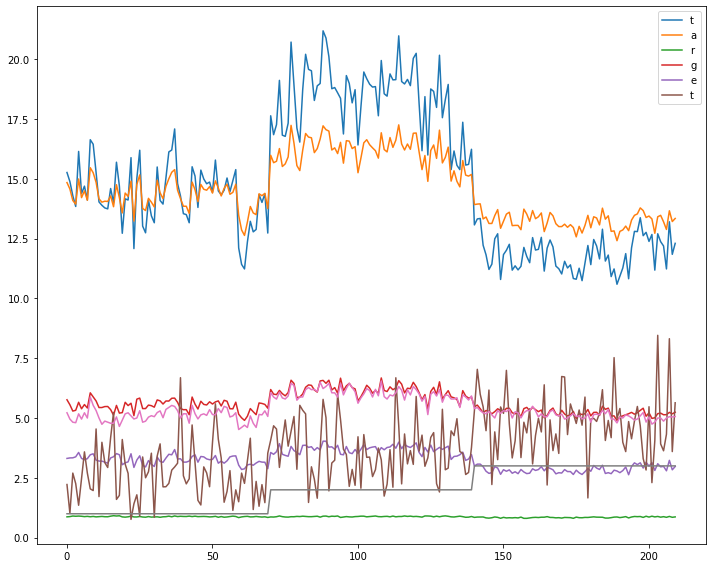

In [390]:
plt.figure(figsize=(10,8))
for i in df.columns:
    plt.plot(df[i])
    save_fig(f"{i}")
    plt.legend(i)

In [391]:
df1 = df.drop('target', axis=1)
df1.columns
df1_corr = df1.corr()

<AxesSubplot:>

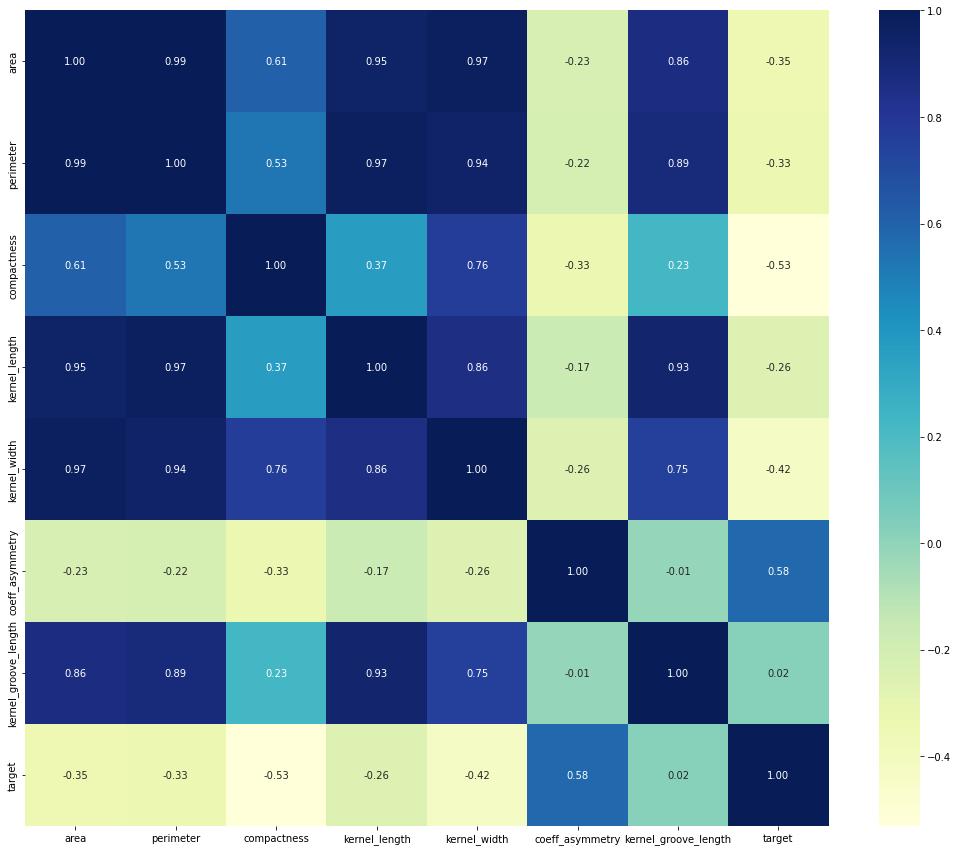

In [392]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap="YlGnBu")
# save_fig("HeatMap")

In [393]:
df.corr()['target']

area                   -0.346058
perimeter              -0.327900
compactness            -0.531007
kernel_length          -0.257269
kernel_width           -0.423463
coeff_asymmetry         0.577273
kernel_groove_length    0.024301
target                  1.000000
Name: target, dtype: float64

<AxesSubplot:xlabel='target'>

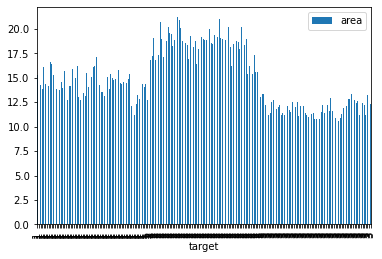

In [394]:
df.plot(y='area',kind='bar', x='target')

Saving figure:  area and area 


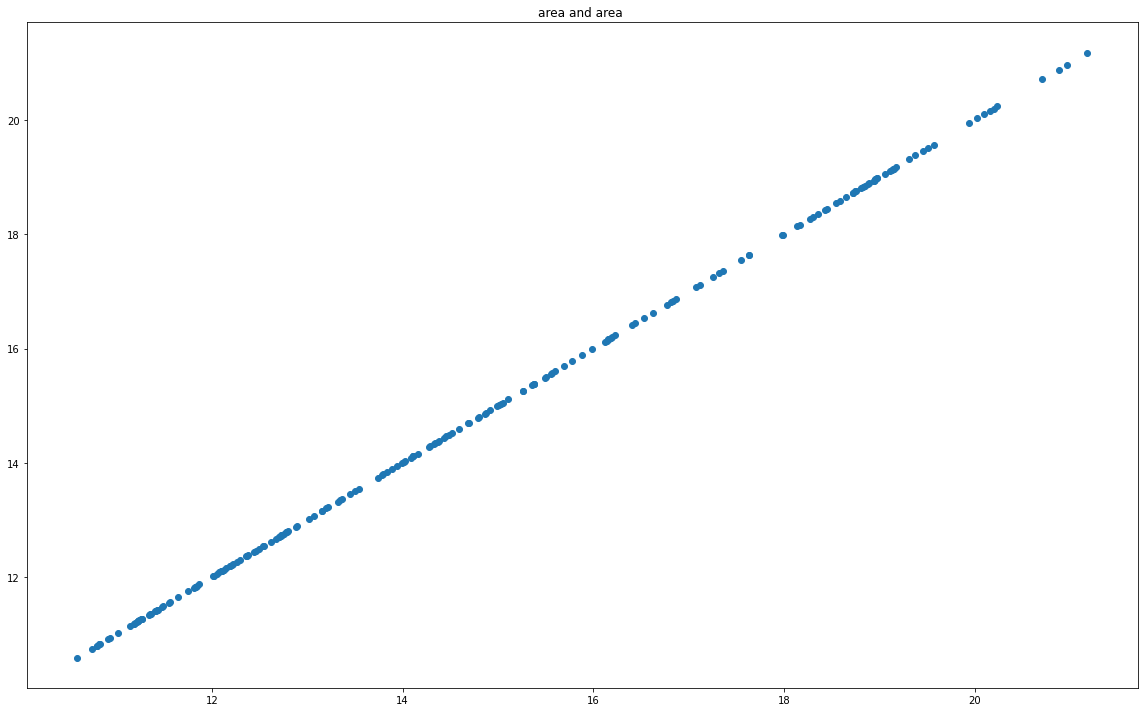

Saving figure:  perimeter and area 


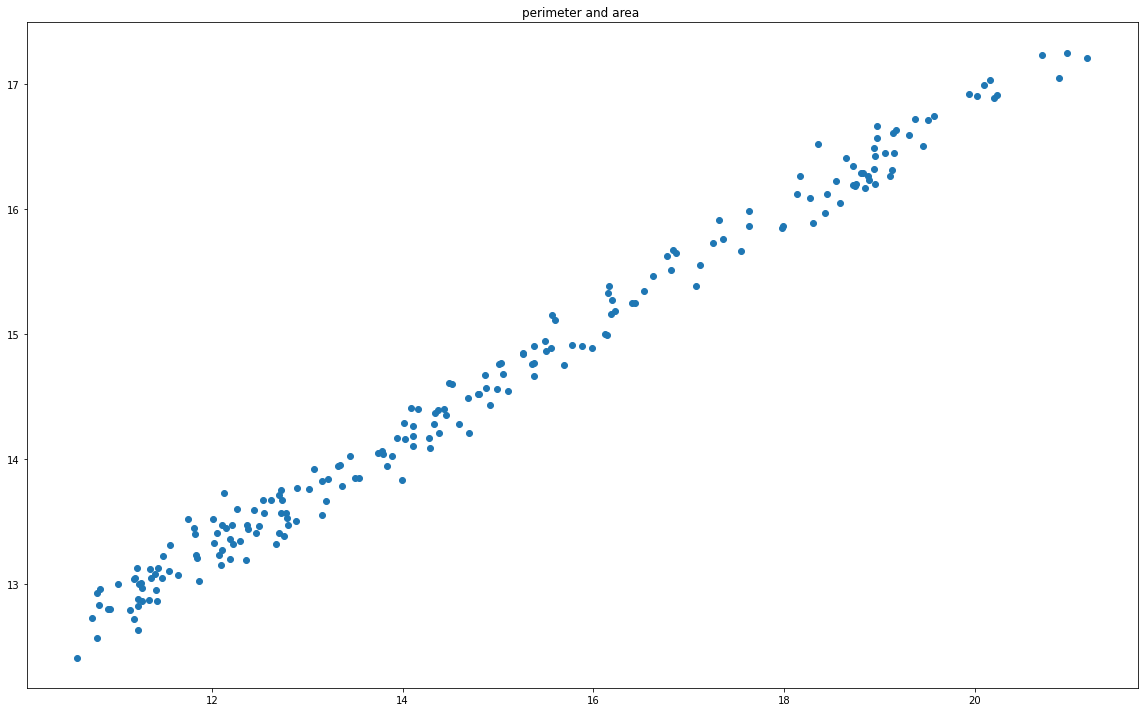

Saving figure:  compactness and area 


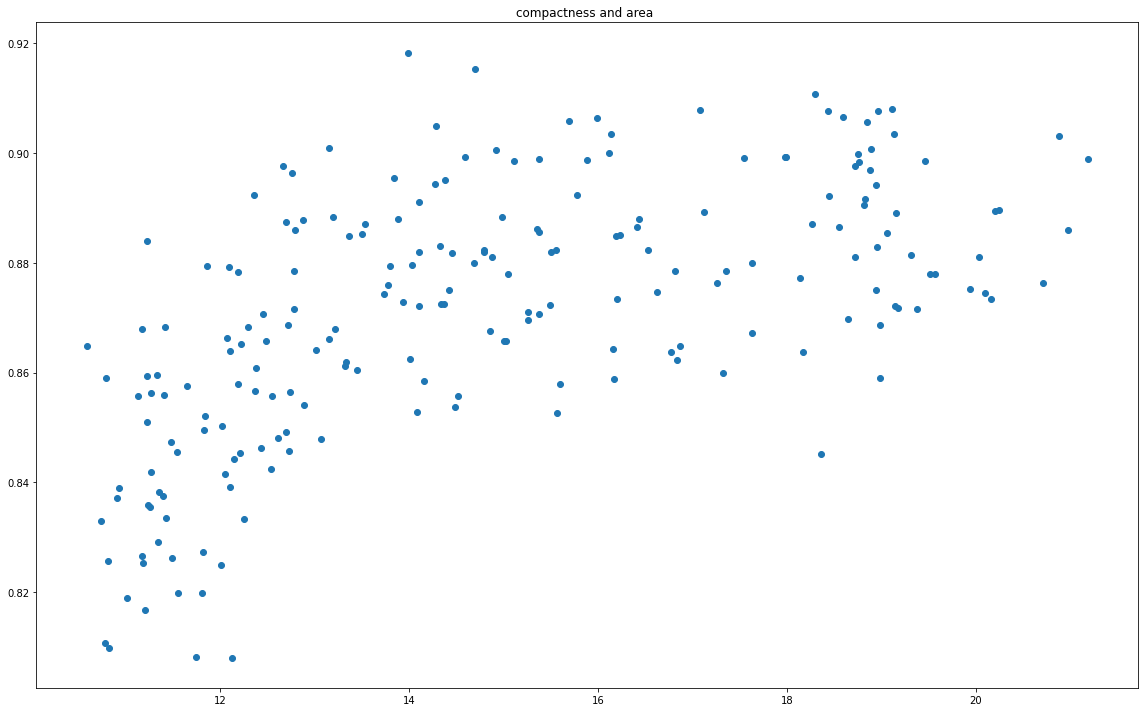

Saving figure:  kernel_length and area 


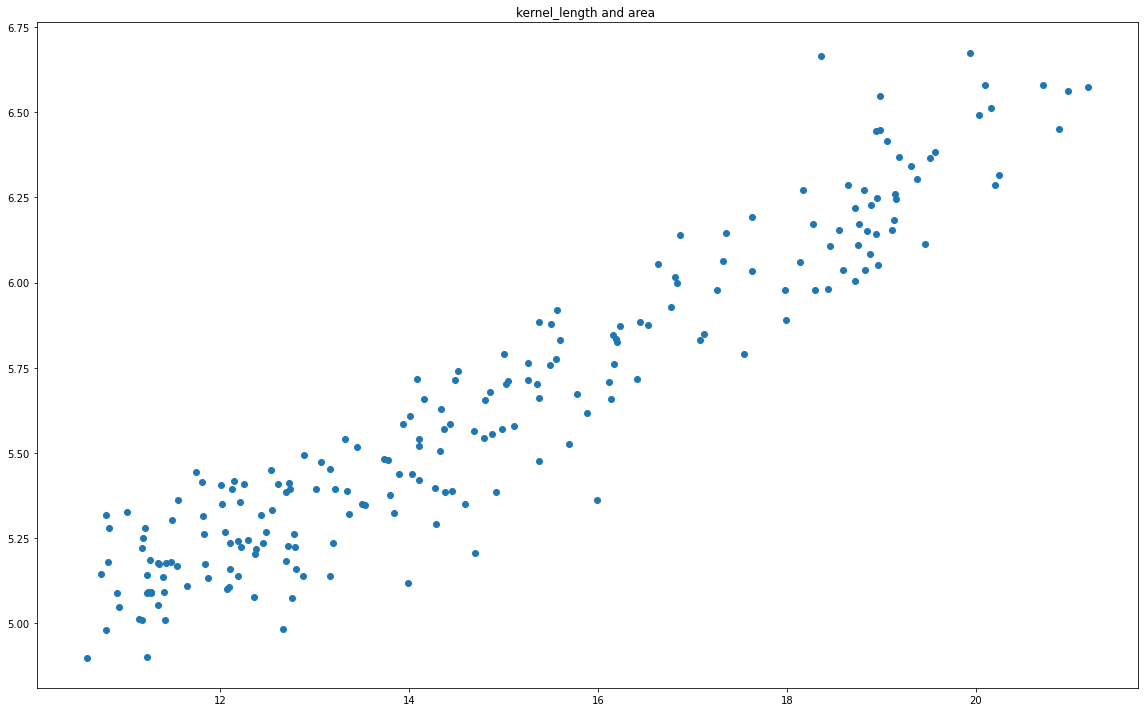

Saving figure:  kernel_width and area 


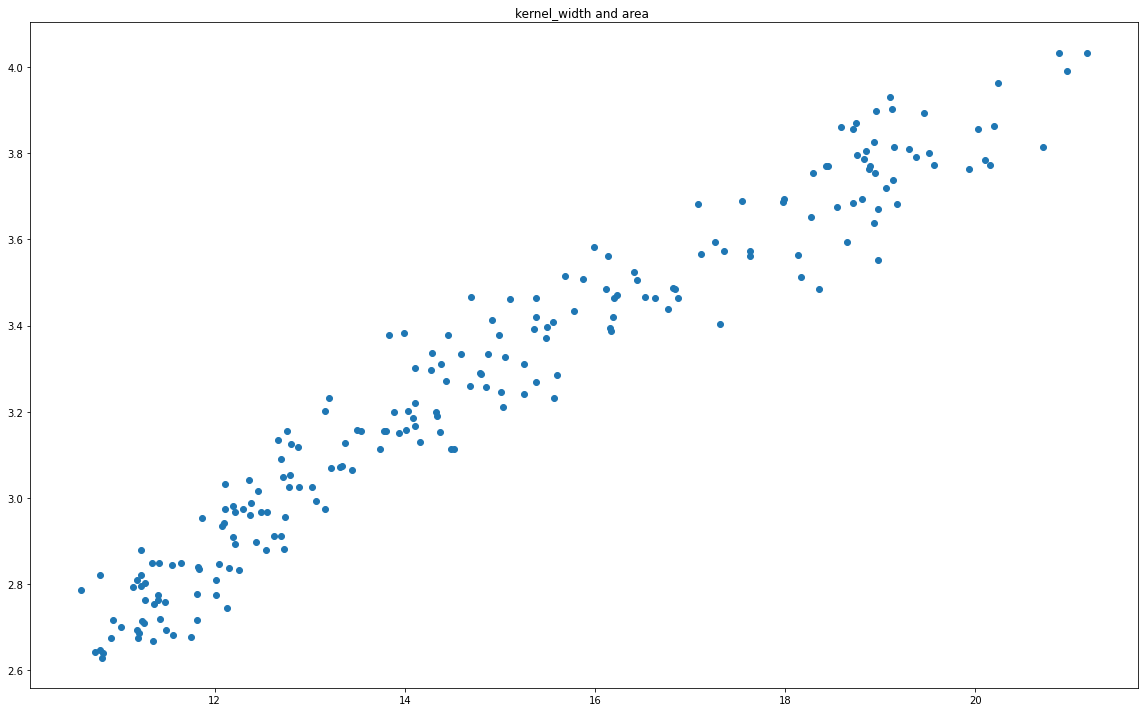

Saving figure:  coeff_asymmetry and area 


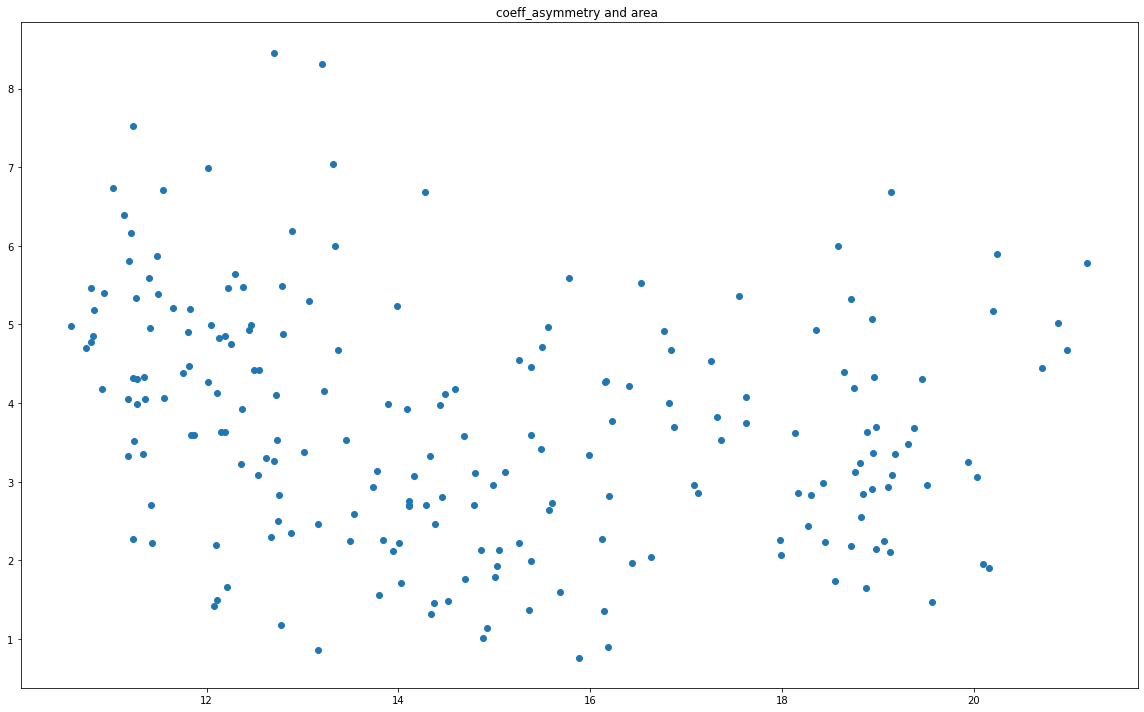

Saving figure:  kernel_groove_length and area 


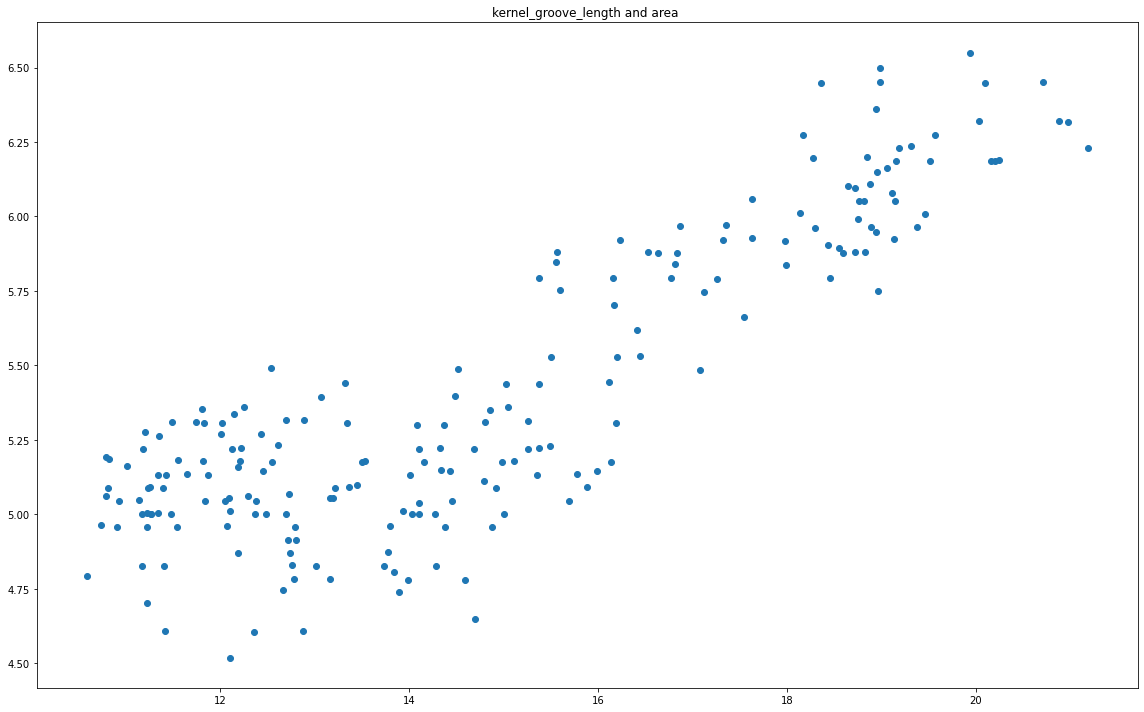

Saving figure:  target and area 


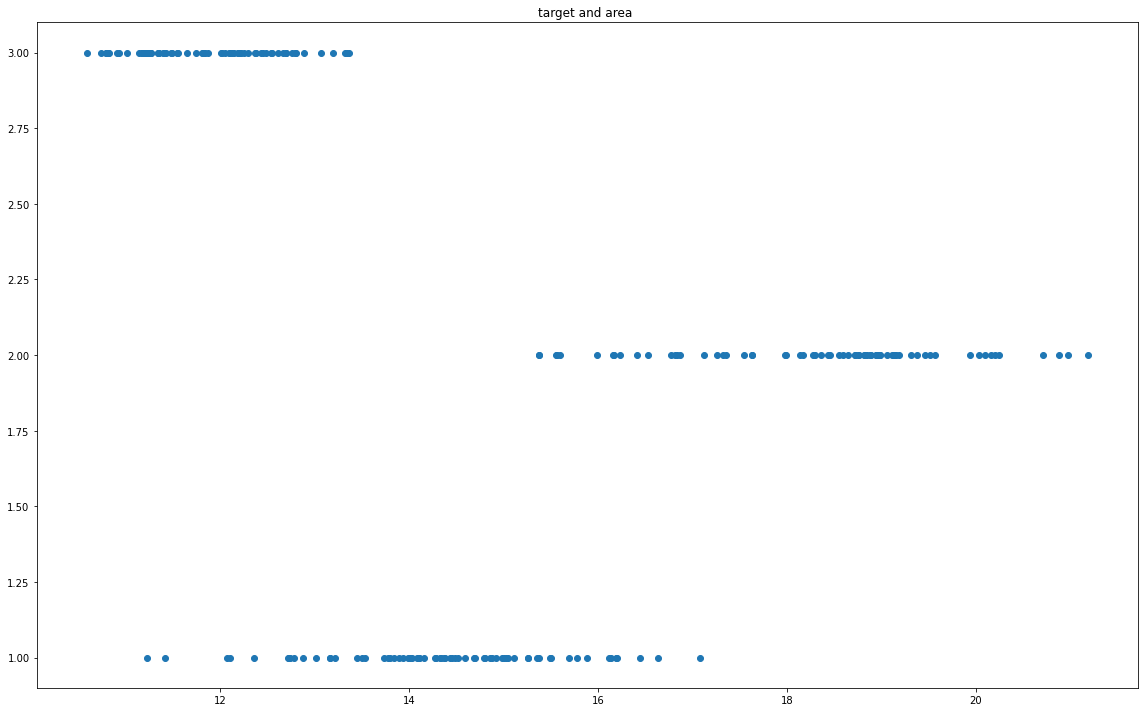

In [395]:

# plt.stackplot()
for i in df.columns:
    plt.figure(figsize=(16,10))
    plt.scatter(x='area',y=i,data=df)
    plt.title(f"{i} and area ")
    save_fig(f"{i} and area ")
    plt.show()

In [396]:
df.corr().sort_values('target')

,area,perimeter,compactness,kernel_length,kernel_width,coeff_asymmetry,kernel_groove_length,target
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
kernel_width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
kernel_length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
kernel_groove_length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
coeff_asymmetry,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
target,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [397]:
X = df1
y = df['target']
X = np.array(X)
# [Kama: -1, Rosa: -2 and Canadian: -3]
X

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [398]:
y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: target, Length: 210, dtype: int64

Saving figure:  Clustering vd Classification


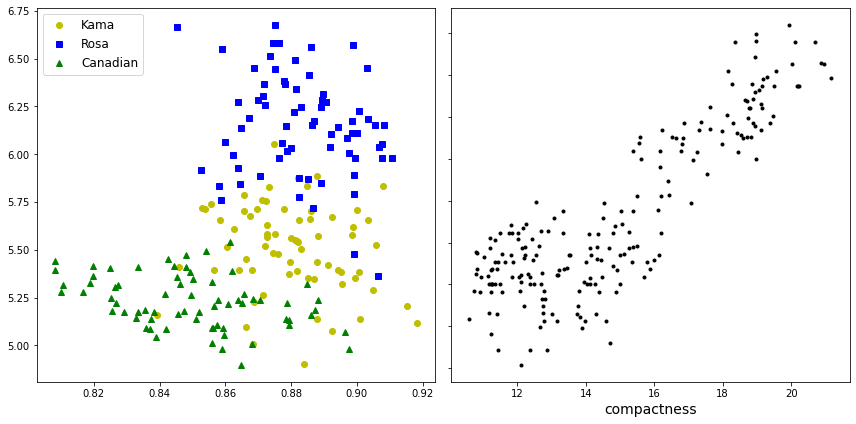

In [399]:
plt.figure(figsize=(12, 6))
plt.subplot(121)

plt.plot(X[y==1, 2], X[y==1, 3], "yo", label="Kama")
plt.plot(X[y==2, 2], X[y==2, 3], "bs", label="Rosa")
plt.plot(X[y==3, 2], X[y==3, 3], "g^", label="Canadian")

plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 6], c="k", marker=".")
plt.xlabel("compactness", fontsize=14)
plt.tick_params(labelleft=False)
# plt.subplot(122)
# plt.scatter(X[:, 2], X[:, 6], c="k", marker=".")
# plt.tick_params(labelleft=False)
save_fig("Clustering vd Classification")

### Looking a like a clustering project

In [400]:
from sklearn.mixture import GaussianMixture

In [401]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [402]:
from scipy import stats
mapping = {}
for class_id in np.unique(y):
    mode, _,= stats.mode(y_pred[y==class_id])
    print(mode[0])
    print(class_id)
    mapping[mode[0]] = class_id
mapping
    

1
1
0
2
2
3


{1: 1, 0: 2, 2: 3}

In [403]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

Saving figure:  Clustering Diagram: coeff vs kernel groove length


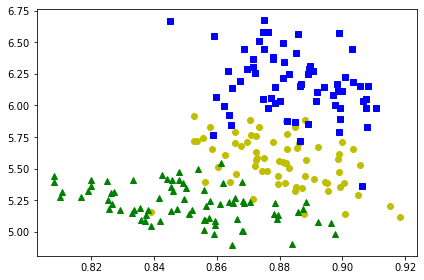

In [404]:
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], 'yo', label="Cluster 1")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], 'bs', label="Cluster 2")
plt.plot(X[y_pred==3, 2], X[y_pred==3, 3], 'g^', label="Cluster 3")
save_fig("Clustering Diagram: coeff vs kernel groove length")

In [405]:
[y_pred==1, 2]
len([y_pred==0, 1][0])


210

In [406]:
X[y_pred==1, 2]#, X[y_pred==1, 3]

array([0.871 , 0.8811, 0.905 , 0.8955, 0.9034, 0.8951, 0.8799, 0.8911,
       0.888 , 0.8696, 0.8796, 0.888 , 0.8759, 0.8744, 0.8993, 0.9183,
       0.9058, 0.9153, 0.8584, 0.8722, 0.8988, 0.8657, 0.8849, 0.8641,
       0.8564, 0.882 , 0.8604, 0.8662, 0.8724, 0.8529, 0.8728, 0.8779,
       0.9   , 0.8734, 0.8823, 0.8944, 0.8871, 0.8852, 0.9009, 0.882 ,
       0.8986, 0.8794, 0.8861, 0.8883, 0.8819, 0.8676, 0.8751, 0.8923,
       0.8538, 0.8831, 0.8557, 0.8658, 0.8818, 0.9006, 0.8857, 0.8392,
       0.8716, 0.8879, 0.8726, 0.8625, 0.8726, 0.8706, 0.8823, 0.899 ,
       0.8527, 0.858 , 0.8849])

# Pyspark

In [407]:
import pyspark

In [408]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("")#.getOrCreate()


In [409]:
from pyspark.ml.clustering import KMeans

In [410]:
# dataset = spark.read.csv("WhreatKernel.csv",header=True,inferSchema=True)
dataset = pd.read_csv("WheatKernal.csv")
dataset = dataset.drop('target', axis=1)

In [411]:
dataset.describe()

,area,perimeter,compactness,kernel_length,kernel_width,coeff_asymmetry,kernel_groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [412]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

dataset.columns

Index(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'coeff_asymmetry', 'kernel_groove_length'],
      dtype='object')

In [413]:
# vec_assembler = VectorAssembler(inputCols = dataset.columns, outputCol='features')
# VectorAssembler()
# final_data = vec_assembler.transform(dataset)
# final_data.show()

In [414]:
dataset.head()

array = np.array(dataset)
X_array = array

In [415]:
X_array[1:7]

array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ],
       [14.38  , 14.21  ,  0.8951,  5.386 ,  3.312 ,  2.462 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ]])

In [416]:
y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: target, Length: 210, dtype: int64

In [417]:
dataset.iloc[:,[0, 1,2,3, 4,5,6]]

,area,perimeter,compactness,kernel_length,kernel_width,coeff_asymmetry,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [418]:
dataset.columns[0:]

Index(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'coeff_asymmetry', 'kernel_groove_length'],
      dtype='object')

In [419]:
# df['All'] = df[df.columns[1:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
dataset["All"] = dataset[dataset.columns].apply(lambda x: ",".join(x.dropna().astype(str)), axis=1)

In [420]:
# dataset['area'] + ","+ dataset['perimeter']
data = dataset[['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'coeff_asymmetry', 'kernel_groove_length']].agg(lambda x: ','.join(x.astype(str)), axis=1).T


In [421]:
data = np.array(data)
data.shape
dataset.shape

(210, 8)

In [422]:
B = np.reshape(data, (-1, 2))
B.shape

(105, 2)

In [423]:
dataset[:]
X_new = dataset[['area', 'compactness','coeff_asymmetry','kernel_groove_length']]
X_new = np.array(X_new)
X_new[:,3]

array([5.22 , 4.956, 4.825, 4.805, 5.175, 4.956, 5.219, 5.   , 5.877,
       5.533, 5.314, 5.001, 4.738, 4.872, 4.825, 4.781, 4.781, 5.046,
       4.649, 4.914, 5.176, 5.219, 5.091, 4.961, 5.001, 5.307, 4.825,
       4.869, 5.038, 5.097, 5.056, 5.228, 5.299, 5.012, 5.36 , 5.443,
       5.527, 5.484, 5.309, 5.001, 5.178, 5.176, 4.783, 5.528, 5.18 ,
       4.961, 5.132, 5.175, 5.111, 5.351, 5.144, 5.136, 5.396, 5.224,
       5.487, 5.439, 5.044, 5.088, 5.222, 4.519, 4.607, 4.703, 4.605,
       5.088, 4.782, 4.607, 5.15 , 5.132, 5.3  , 5.067, 6.06 , 5.877,
       5.791, 6.079, 5.841, 5.795, 5.922, 6.451, 6.362, 5.746, 5.88 ,
       5.879, 6.187, 6.273, 6.185, 6.197, 6.109, 6.498, 6.231, 6.321,
       6.449, 6.053, 6.053, 5.877, 6.448, 5.967, 6.238, 6.453, 6.273,
       6.097, 5.618, 5.837, 6.009, 6.229, 6.148, 5.879, 6.2  , 5.929,
       6.55 , 5.894, 5.794, 5.965, 5.924, 6.053, 6.316, 6.163, 5.75 ,
       6.185, 5.966, 6.32 , 6.188, 6.011, 5.703, 5.905, 5.144, 5.992,
       6.102, 5.919,

Saving figure:  Clustering Diagram: Area vs coeff Assymetry


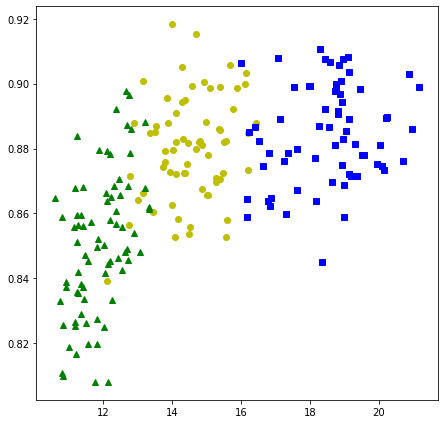

In [424]:
plt.figure(figsize=(12, 6))
plt.subplot(121)

plt.plot(X_new[y_pred==1, 0], X_new[y_pred==1, 1], 'yo', label="Cluster 1")
plt.plot(X_new[y_pred==2, 0], X_new[y_pred==2, 1], 'bs', label="Cluster 2")
plt.plot(X_new[y_pred==3, 0], X_new[y_pred==3, 1], 'g^', label="Cluster 3")

save_fig("Clustering Diagram: Area vs coeff Assymetry")

Saving figure:  Clustering Diagram: Kernel Assymetry vs kernel groove length


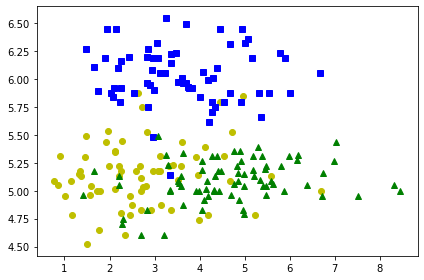

In [425]:
plt.plot(X_new[y_pred==1, 2], X_new[y_pred==1, 3], 'yo', label="Cluster 1")
plt.plot(X_new[y_pred==2, 2], X_new[y_pred==2, 3], 'bs', label="Cluster 2")
plt.plot(X_new[y_pred==3, 2], X_new[y_pred==3, 3], 'g^', label="Cluster 3")
save_fig("Clustering Diagram: Kernel Assymetry vs kernel groove length")

In [426]:
X_new.shape
array = np.array([])


In [427]:
main_array = []
X_new = dataset[['area', 'compactness','coeff_asymmetry','kernel_groove_length']]
 # = np.array(X_new)
for i in X_new.columns:
    i =  np.array(X_new[[i]])
    print(i.shape)
    main_array.append(i)

(210, 1)
(210, 1)
(210, 1)
(210, 1)


In [428]:
# array.concatenate()

final = np.concatenate((main_array[0],main_array[1],main_array[2], main_array[3]), axis=1)

In [429]:
final[:,1]

array([0.871 , 0.8811, 0.905 , 0.8955, 0.9034, 0.8951, 0.8799, 0.8911,
       0.8747, 0.888 , 0.8696, 0.8796, 0.888 , 0.8759, 0.8744, 0.8993,
       0.9183, 0.9058, 0.9153, 0.8686, 0.8584, 0.8722, 0.8988, 0.8664,
       0.8657, 0.8849, 0.8641, 0.8564, 0.882 , 0.8604, 0.8662, 0.8724,
       0.8529, 0.8728, 0.8779, 0.9   , 0.8734, 0.9079, 0.8823, 0.8944,
       0.8871, 0.8852, 0.9009, 0.882 , 0.8986, 0.8794, 0.8861, 0.8883,
       0.8819, 0.8676, 0.8751, 0.8923, 0.8538, 0.8831, 0.8557, 0.8658,
       0.8818, 0.9006, 0.8857, 0.8392, 0.8683, 0.884 , 0.8923, 0.868 ,
       0.8716, 0.8879, 0.8726, 0.8625, 0.8726, 0.8458, 0.8673, 0.8623,
       0.8763, 0.9081, 0.8786, 0.8638, 0.8599, 0.8763, 0.875 , 0.8892,
       0.8823, 0.8977, 0.8894, 0.8779, 0.878 , 0.887 , 0.8969, 0.859 ,
       0.8989, 0.9031, 0.8746, 0.8984, 0.8906, 0.9066, 0.8452, 0.8648,
       0.8815, 0.8687, 0.8637, 0.881 , 0.8866, 0.8992, 0.8985, 0.8717,
       0.8829, 0.8917, 0.9056, 0.88  , 0.8752, 0.8865, 0.8921, 0.8716,
      

In [430]:
for i in main_array:
    print(i.shape)

(210, 1)
(210, 1)
(210, 1)
(210, 1)


In [431]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

pca.fit(X)
X
pca.explained_variance_ratio_
pca.singular_values_

array([47.49531899])

# KMeans : Clustering

In [533]:
import os
file = "WheatKernal.csv"
file_path = os.path.join(file)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(file_path)
y = df['target']
df = df.drop('target',axis=1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   kernel_length         210 non-null    float64
 4   kernel_width          210 non-null    float64
 5   coeff_asymmetry       210 non-null    float64
 6   kernel_groove_length  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


,area,perimeter,compactness,kernel_length,kernel_width,coeff_asymmetry,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [433]:
X = df.iloc[:, [0, 5, 6]].values

In [434]:
from sklearn.cluster import KMeans

Saving figure:  WCSS Elbow Method


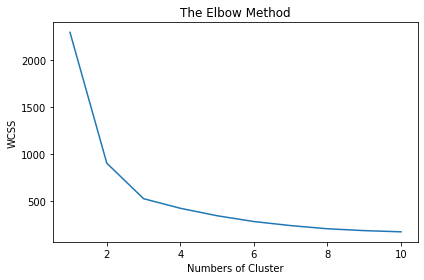

In [435]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Numbers of Cluster")
plt.ylabel("WCSS")
save_fig("WCSS Elbow Method")
plt.show()

In [436]:
kmeans_3n = KMeans(n_clusters=3, init='k-means++')
y_3n = kmeans_3n.fit_predict(X)
y_3n

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [437]:
kmeans_4n = KMeans(n_clusters=4, init='k-means++')
y_4n = kmeans_4n.fit_predict(X)
y_4n

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 0, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 0, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0])

In [438]:
kmeans_3n.cluster_centers_

array([[18.68451613,  3.61348387,  6.05887097],
       [11.93756757,  4.83916216,  5.09601351],
       [14.5427027 ,  2.63389459,  5.17486486]])

In [439]:
kmeans_4n.cluster_centers_

array([[11.91557143,  4.94612857,  5.08478571],
       [16.29484848,  3.86830303,  5.6539697 ],
       [19.15104167,  3.46041667,  6.12725   ],
       [14.01542373,  2.32303729,  5.069     ]])

Saving figure:  Clustering Diagram: Area vs Coeff Assy n=3


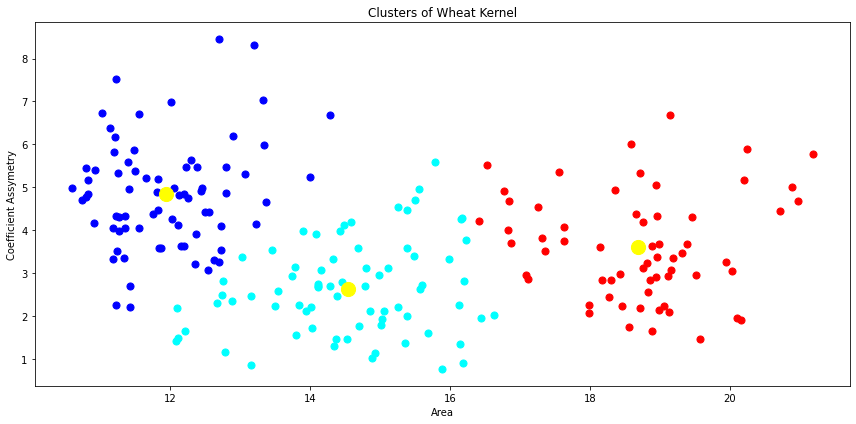

In [440]:
plt.figure(figsize=(12,6))
plt.scatter(X[y_3n==0,0], X[y_3n==0, 1], s=50, c='red', label='cluster1')
plt.scatter(X[y_3n==1,0], X[y_3n==1, 1], s=50, c='blue', label='cluster2')
plt.scatter(X[y_3n==2,0], X[y_3n==2, 1], s=50, c='cyan', label='cluster3')

plt.scatter(kmeans_3n.cluster_centers_[:,0], kmeans_3n.cluster_centers_[:,1], s=200, c='yellow',label="centroid")

plt.title("Clusters of Wheat Kernel")
plt.xlabel("Area")
plt.ylabel("Coefficient Assymetry")
save_fig("Clustering Diagram: Area vs Coeff Assy n=3")
# "kernel_groove_length"

Saving figure:  Clustering Diagram: Area vs KernelGrooveLength n=3


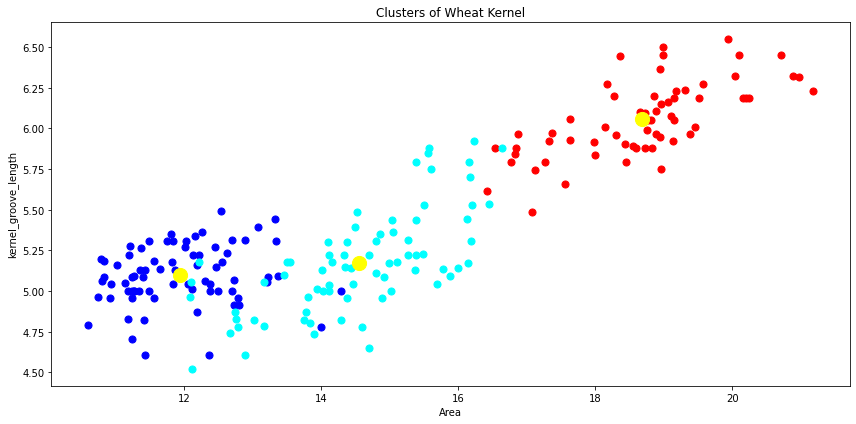

In [441]:
plt.figure(figsize=(12,6))

plt.scatter(X[y_3n==0,0], X[y_3n==0, 2], s=50, c='red', label='cluster1')
plt.scatter(X[y_3n==1,0], X[y_3n==1, 2], s=50, c='blue', label='cluster2')
plt.scatter(X[y_3n==2,0], X[y_3n==2, 2], s=50, c='cyan', label='cluster3')

plt.scatter(kmeans_3n.cluster_centers_[:,0], kmeans_3n.cluster_centers_[:,2], s=200, c='yellow',label="centroid")

plt.title("Clusters of Wheat Kernel")
plt.xlabel("Area")
plt.ylabel("kernel_groove_length")
save_fig("Clustering Diagram: Area vs KernelGrooveLength n=3")

Saving figure:  Clustering Diagram: Area vs Coeff Assy n=4


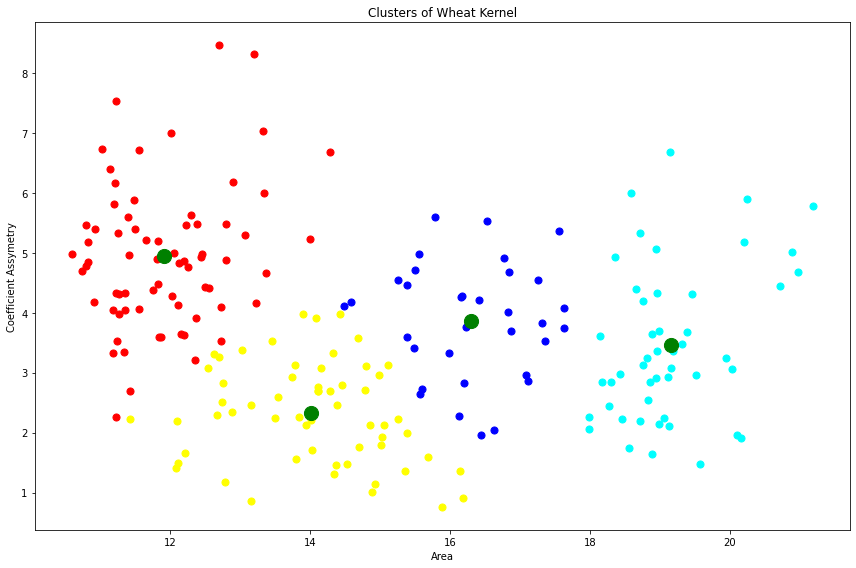

In [442]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_4n==0,0], X[y_4n==0, 1], s=50, c='red', label='cluster1')
plt.scatter(X[y_4n==1,0], X[y_4n==1, 1], s=50, c='blue', label='cluster2')
plt.scatter(X[y_4n==2,0], X[y_4n==2, 1], s=50, c='cyan', label='cluster3')
plt.scatter(X[y_4n==3,0], X[y_4n==3, 1], s=50, c='yellow', label='cluster4')

plt.scatter(kmeans_4n.cluster_centers_[:,0], kmeans_4n.cluster_centers_[:,1], s=200, c='green',label="centroid")
plt.title("Clusters of Wheat Kernel")
plt.xlabel("Area")
plt.ylabel("Coefficient Assymetry")
save_fig("Clustering Diagram: Area vs Coeff Assy n=4")

Saving figure:  Clustering Diagram: Area vs KernelGrooveLength n=4


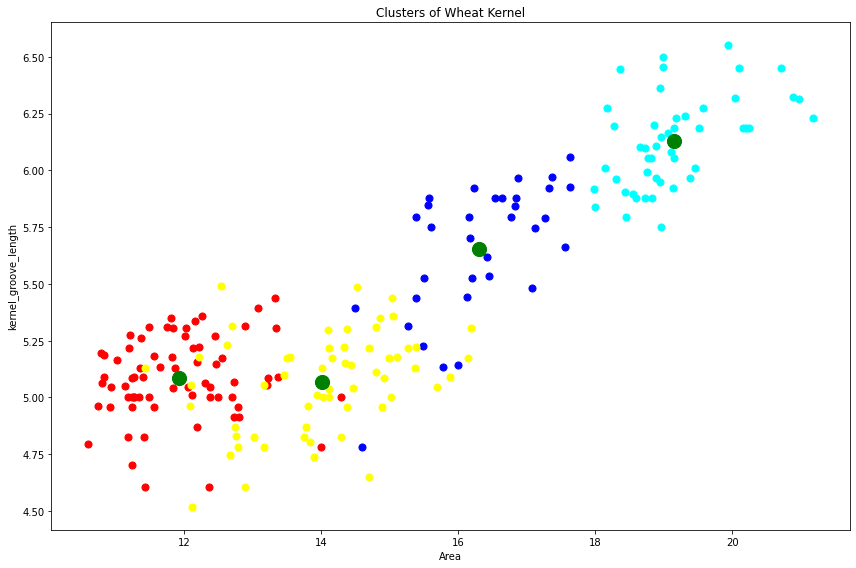

In [443]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_4n==0,0], X[y_4n==0, 2], s=50, c='red', label='cluster1')
plt.scatter(X[y_4n==1,0], X[y_4n==1, 2], s=50, c='blue', label='cluster2')
plt.scatter(X[y_4n==2,0], X[y_4n==2, 2], s=50, c='cyan', label='cluster3')
plt.scatter(X[y_4n==3,0], X[y_4n==3, 2], s=50, c='yellow', label='cluster4')

plt.scatter(kmeans_4n.cluster_centers_[:,0], kmeans_4n.cluster_centers_[:,2], s=200, c='green',label="centroid")
plt.title("Clusters of Wheat Kernel")
plt.xlabel("Area")
plt.ylabel("kernel_groove_length")
save_fig("Clustering Diagram: Area vs KernelGrooveLength n=4")

Saving figure:  Clustering Diagram: Coeff Assym vs KernelGrooveLength n=3


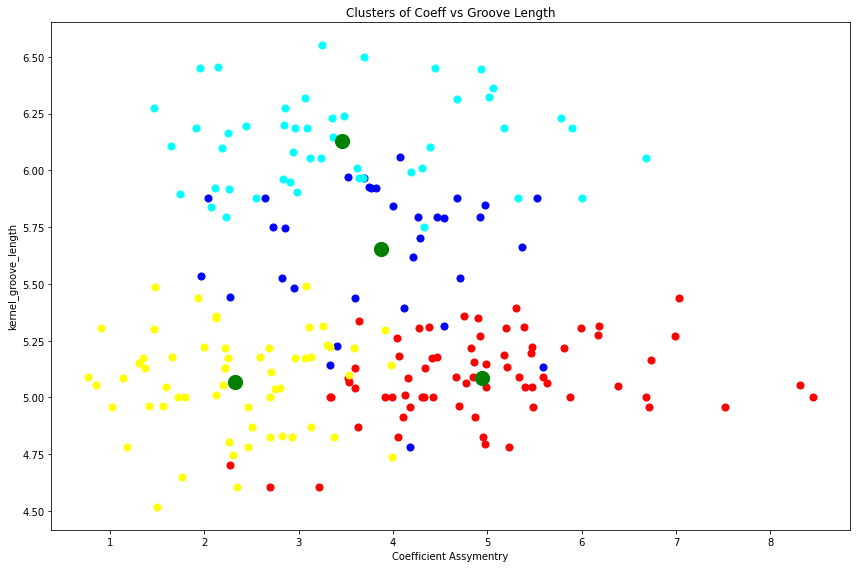

In [444]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_4n==0,1], X[y_4n==0, 2], s=50, c='red', label='cluster1')
plt.scatter(X[y_4n==1,1], X[y_4n==1, 2], s=50, c='blue', label='cluster2')
plt.scatter(X[y_4n==2,1], X[y_4n==2, 2], s=50, c='cyan', label='cluster3')
plt.scatter(X[y_4n==3,1], X[y_4n==3, 2], s=50, c='yellow', label='cluster4')

plt.scatter(kmeans_4n.cluster_centers_[:,1], kmeans_4n.cluster_centers_[:,2], s=200, c='green',label="centroid")
plt.title("Clusters of Coeff vs Groove Length")
plt.xlabel("Coefficient Assymentry")
plt.ylabel("kernel_groove_length")
save_fig("Clustering Diagram: Coeff Assym vs KernelGrooveLength n=3")

In [445]:
# Lets find score 
from sklearn.metrics import silhouette_score
sil_avg= []
for i in range(2, 10):
    cluster_model = KMeans(n_clusters=i, init="k-means++")
    cluster_labels = cluster_model.fit_predict(X)
    sil_avg_score = silhouette_score(X, cluster_labels)
    sil_avg.append(sil_avg_score)

In [446]:
sil_avg

[0.5115974532766332,
 0.46805180745586755,
 0.41034525886055945,
 0.3670801586486934,
 0.3692005384367575,
 0.3653992224010148,
 0.37653833759293565,
 0.35821980994140346]

In [447]:
X[:5]

array([[15.26 ,  2.221,  5.22 ],
       [14.88 ,  1.018,  4.956],
       [14.29 ,  2.699,  4.825],
       [13.84 ,  2.259,  4.805],
       [16.14 ,  1.355,  5.175]])

In [448]:
kmeans.labels_

array([9, 9, 2, 2, 9, 2, 2, 2, 9, 9, 4, 2, 2, 2, 2, 2, 8, 9, 9, 6, 2, 2,
       9, 7, 9, 9, 6, 7, 2, 2, 7, 4, 2, 2, 9, 9, 9, 4, 2, 8, 2, 2, 7, 4,
       2, 2, 9, 2, 2, 9, 2, 4, 2, 2, 9, 9, 2, 9, 9, 7, 7, 7, 6, 6, 7, 7,
       9, 2, 9, 6, 4, 4, 4, 5, 4, 4, 4, 3, 3, 4, 4, 3, 3, 1, 5, 1, 1, 5,
       3, 3, 1, 5, 5, 3, 3, 4, 5, 1, 5, 1, 4, 1, 5, 5, 5, 1, 5, 4, 5, 1,
       1, 5, 1, 3, 3, 1, 5, 5, 5, 5, 3, 5, 4, 5, 4, 5, 5, 1, 1, 4, 5, 5,
       4, 4, 4, 4, 4, 9, 9, 4, 8, 8, 8, 0, 6, 0, 7, 6, 6, 0, 0, 8, 6, 6,
       6, 0, 6, 6, 6, 0, 6, 6, 0, 6, 0, 7, 6, 6, 6, 6, 0, 0, 6, 0, 0, 0,
       0, 0, 0, 7, 0, 6, 6, 0, 8, 6, 0, 6, 8, 0, 0, 6, 6, 0, 6, 6, 8, 6,
       6, 7, 0, 7, 6, 8, 6, 6, 6, 8, 6, 0])

In [449]:
X_new = np.array(X[5:10])
kmeans.predict(X_new)

array([2, 2, 2, 9, 9])

In [450]:
kmeans.transform(X_new)

array([[4.25459602, 4.67993656, 0.53012721, 6.28477506, 2.82438186,
        4.83932322, 2.80690101, 2.08992305, 4.42326559, 1.27548645],
       [3.81658177, 4.56231501, 0.82337368, 5.5114681 , 1.95337657,
        4.39112019, 2.66333028, 2.8439618 , 3.51272389, 1.94536554],
       [3.89424632, 4.95625939, 0.26876303, 6.40869862, 2.89038822,
        5.04878097, 2.44833201, 1.90027903, 4.11473017, 1.61362238],
       [6.32432807, 2.28456534, 2.72155332, 4.61332905, 2.16799838,
        2.72807316, 5.04429096, 4.41450751, 5.92855917, 1.38485039],
       [6.1735068 , 2.5277723 , 2.49252451, 4.83245762, 2.23280403,
        2.97530086, 4.85999179, 4.15993504, 5.8366339 , 1.0848708 ]])

# Gaussian Mixture

In [451]:
from sklearn.mixture import GaussianMixture

In [452]:
y_gauss = GaussianMixture(n_components=3, random_state=42,).fit(X).predict(X)

In [453]:
y_gauss

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int64)

In [454]:
from scipy import stats
mapping = {}
for class_id in np.unique(y):
    mode, _, = stats.mode(y_gauss[y==class_id])
    print(mode)
    mapping[mode[0]] = class_id
mapping

[1]
[0]
[2]


{1: 1, 0: 2, 2: 3}

In [455]:
np.unique(y_gauss)

array([0, 1, 2], dtype=int64)

In [456]:
y_pred = np.array([mapping[cls] for cls in y_gauss])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3], dtype=int64)

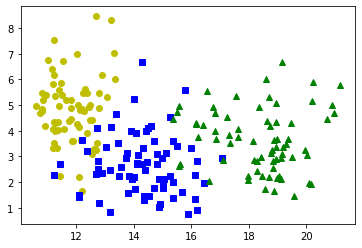

In [457]:
plt.plot(X[y_pred==3, 0], X[y_pred==3,1], 'yo', label='cluster1')
plt.plot(X[y_pred==1, 0], X[y_pred==1,1], 'bs', label='cluster2')
plt.plot(X[y_pred==2, 0], X[y_pred==2,1], 'g^', label='cluster3')

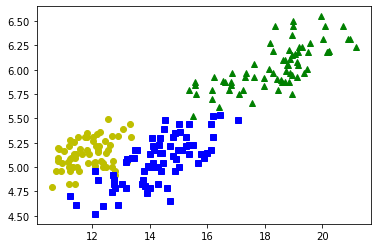

In [458]:
plt.plot(X[y_pred==3, 0], X[y_pred==3,2], 'yo', label='cluster1')
plt.plot(X[y_pred==1, 0], X[y_pred==1,2], 'bs', label='cluster2')
plt.plot(X[y_pred==2, 0], X[y_pred==2,2], 'g^', label='cluster3')

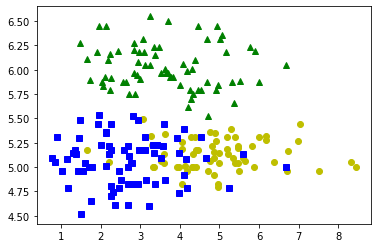

In [459]:
plt.plot(X[y_pred==3, 1], X[y_pred==3,2], 'yo', label='cluster1')
plt.plot(X[y_pred==1, 1], X[y_pred==1,2], 'bs', label='cluster2')
plt.plot(X[y_pred==2, 1], X[y_pred==2,2], 'g^', label='cluster3')

In [460]:
np.sum(y_pred==y)

201

In [461]:
np.sum(y_pred==y)/ len(y_pred) # Accuracy

0.9571428571428572

# Classification : Analysis

In [495]:
X = df
X.shape
X.columns

Index(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'coeff_asymmetry', 'kernel_groove_length'],
      dtype='object')

In [463]:
y.shape

(210,)

In [464]:
col = df.columns.to_list()
col

['area',
 'perimeter',
 'compactness',
 'kernel_length',
 'kernel_width',
 'coeff_asymmetry',
 'kernel_groove_length']

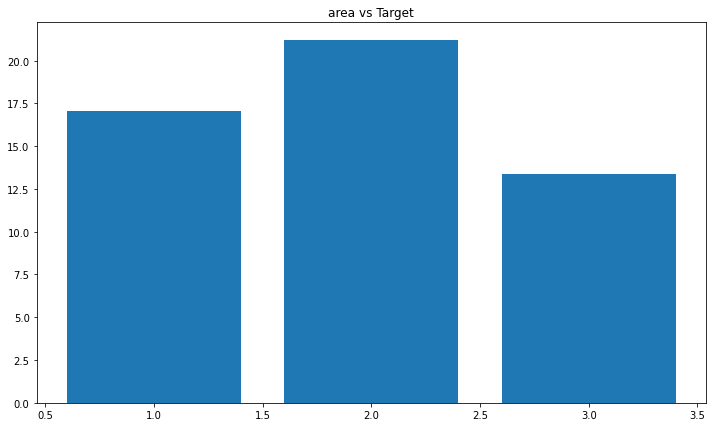

In [465]:
plt.figure(figsize=(12,7))

plt.bar(x=y, height=col[0], data=df)
plt.title(col[0] + " vs Target")
plt.show()

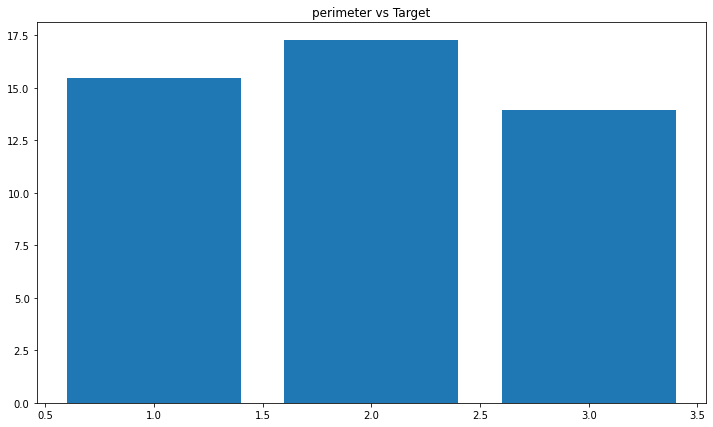

In [466]:
plt.figure(figsize=(12,7))

plt.bar(x=y, height=col[1], data=df)
plt.title(col[1] + " vs Target")
plt.show()

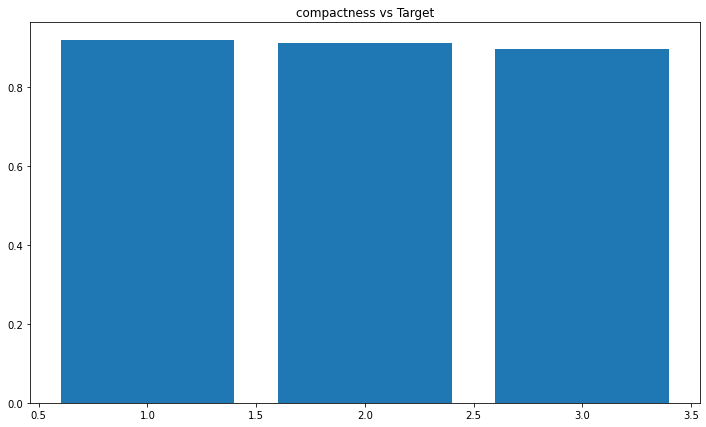

In [467]:
plt.figure(figsize=(12,7))

plt.bar(x=y, height=col[2], data=df)
plt.title(col[2] + " vs Target")
plt.show()

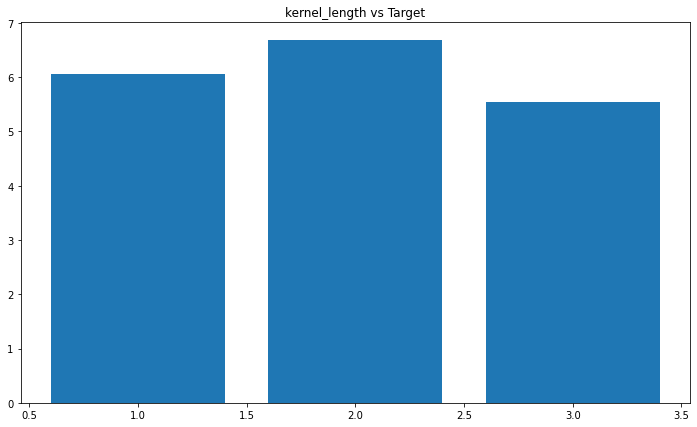

In [468]:
plt.figure(figsize=(12,7))

plt.bar(x=y, height=col[3], data=df)
plt.title(col[3] + " vs Target")
plt.show()

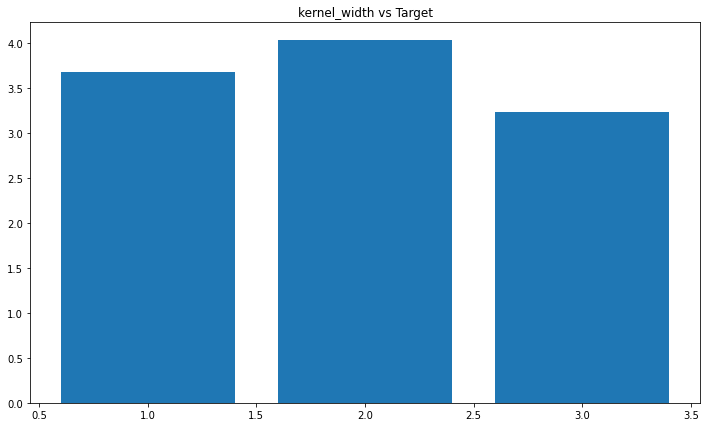

In [469]:
plt.figure(figsize=(12,7))

plt.bar(x=y, height=col[4], data=df)
plt.title(col[4] + " vs Target")
plt.show()

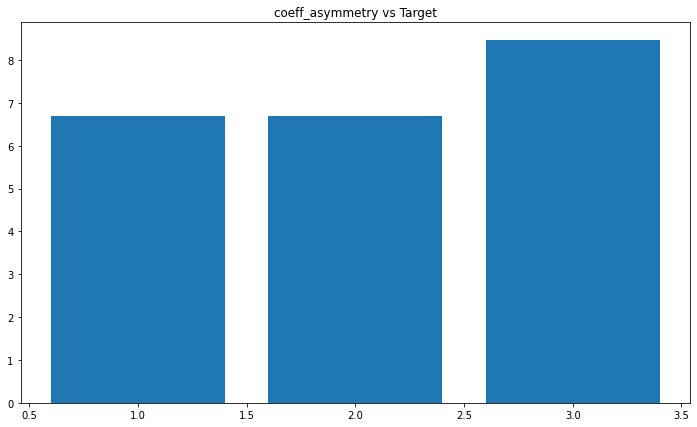

In [470]:
plt.figure(figsize=(12,7))

plt.bar(x=y, height=col[5], data=df)
plt.title(col[5] + " vs Target")
plt.show()

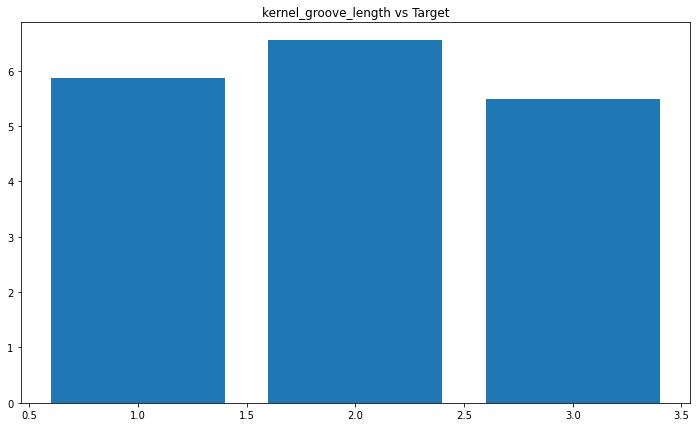

In [471]:
plt.figure(figsize=(12,7))

plt.bar(x=y, height=col[6], data=df)
plt.title(col[6] + " vs Target")
plt.show()

<AxesSubplot:>

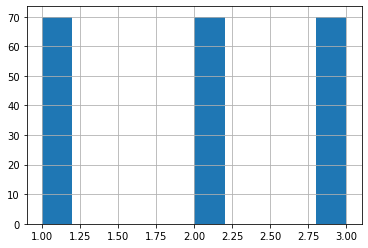

In [472]:
y.hist()

<AxesSubplot:xlabel='target', ylabel='count'>

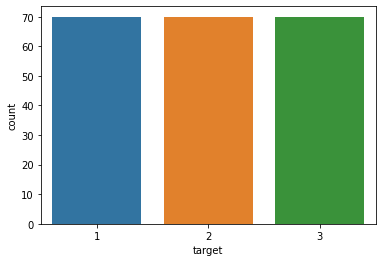

In [473]:
sns.countplot(x=y)

In [474]:
df['area'].value_counts()

15.38    3
11.23    3
14.11    3
15.26    2
18.98    2
        ..
19.11    1
16.82    1
16.77    1
17.32    1
12.30    1
Name: area, Length: 193, dtype: int64

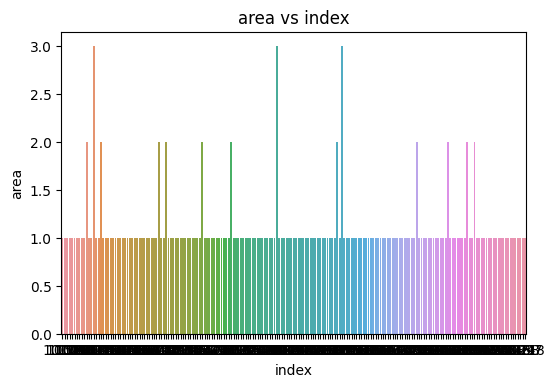

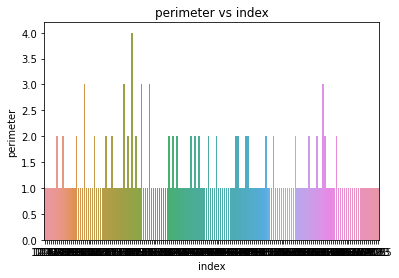

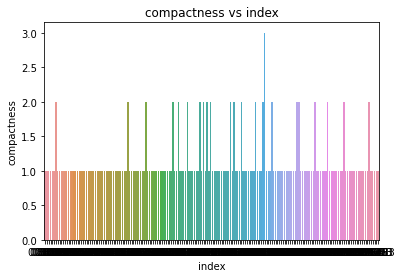

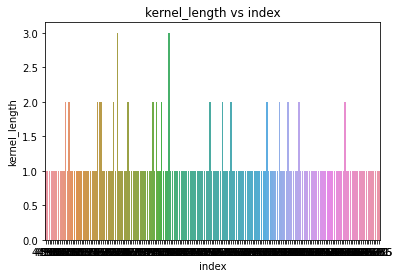

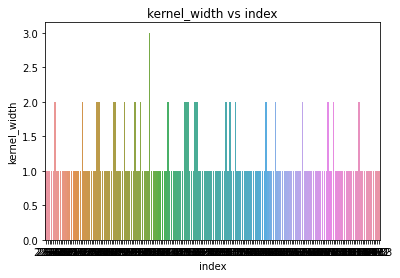

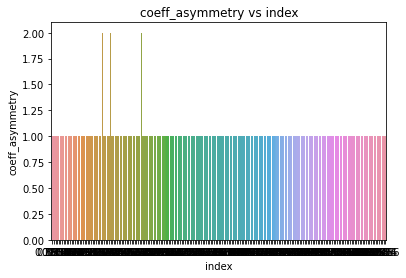

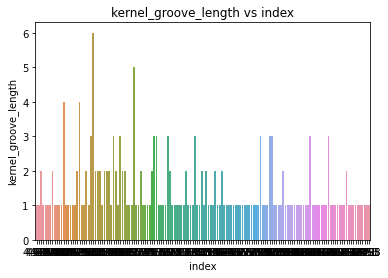

In [475]:
plt.figure(dpi=100)
for i in df.columns.to_list():
    x = df[i].value_counts().reset_index()
    sns.barplot(x='index', y=i, data=x)
    plt.title(f"{i} vs index")
    plt.show()

In [476]:
df.corr()

,area,perimeter,compactness,kernel_length,kernel_width,coeff_asymmetry,kernel_groove_length
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
kernel_length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
kernel_width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
coeff_asymmetry,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
kernel_groove_length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


Saving figure:  Heat Map


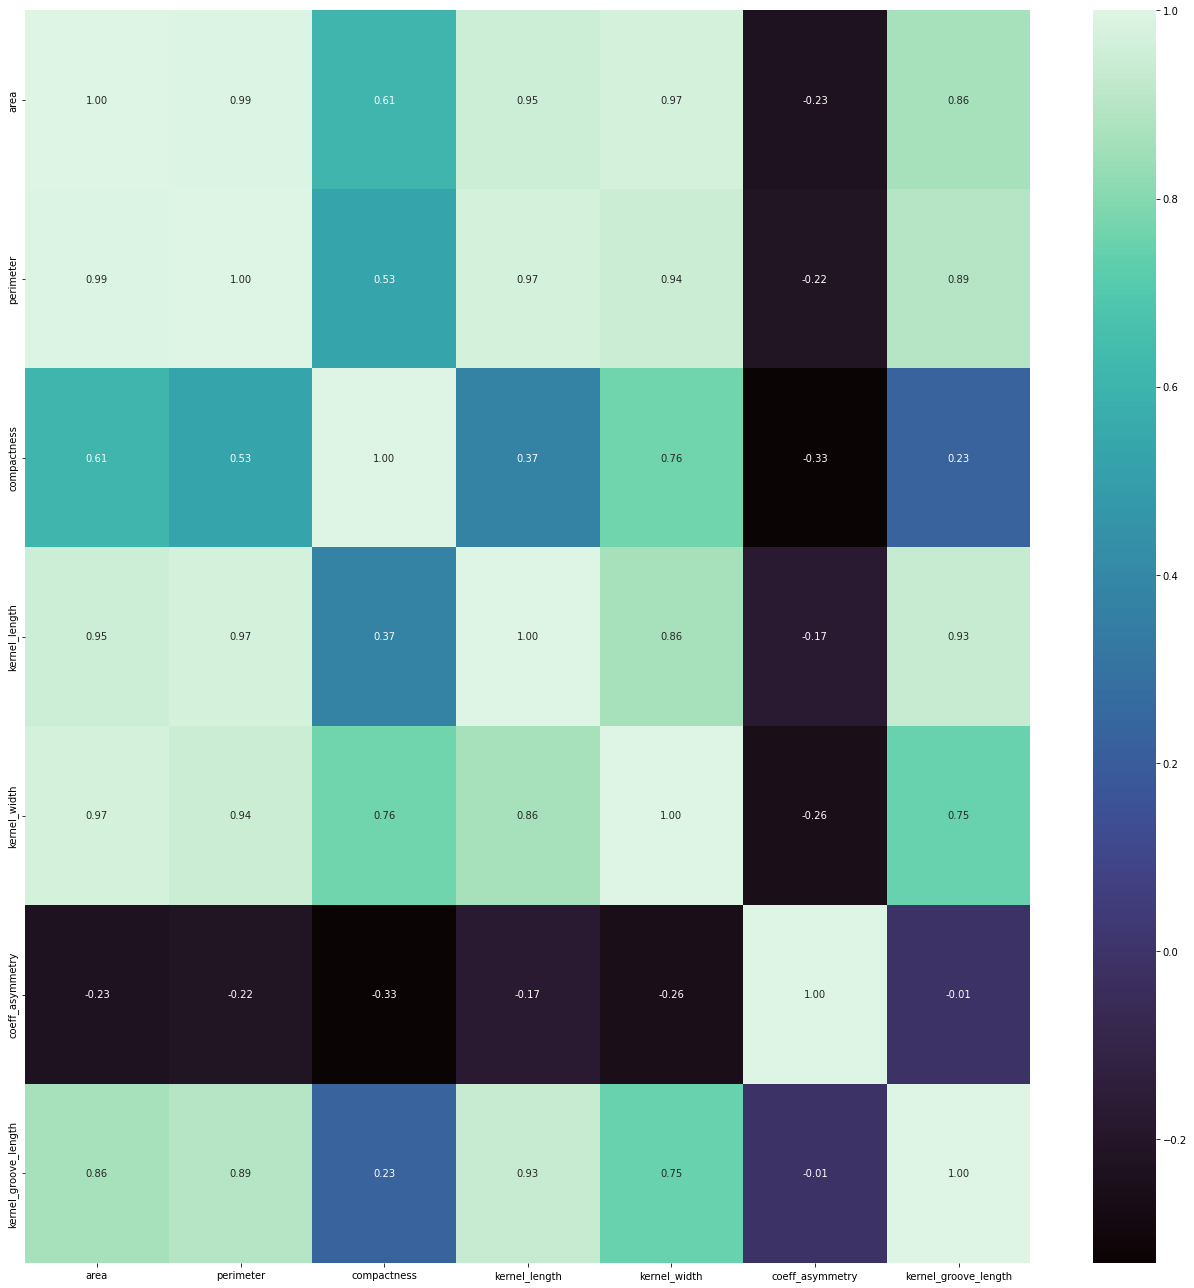

In [477]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="mako")
save_fig("Heat Map")

In [478]:
df1 = pd.read_csv(file_path)

In [479]:
df1.corr()['target']

area                   -0.346058
perimeter              -0.327900
compactness            -0.531007
kernel_length          -0.257269
kernel_width           -0.423463
coeff_asymmetry         0.577273
kernel_groove_length    0.024301
target                  1.000000
Name: target, dtype: float64

<AxesSubplot:>

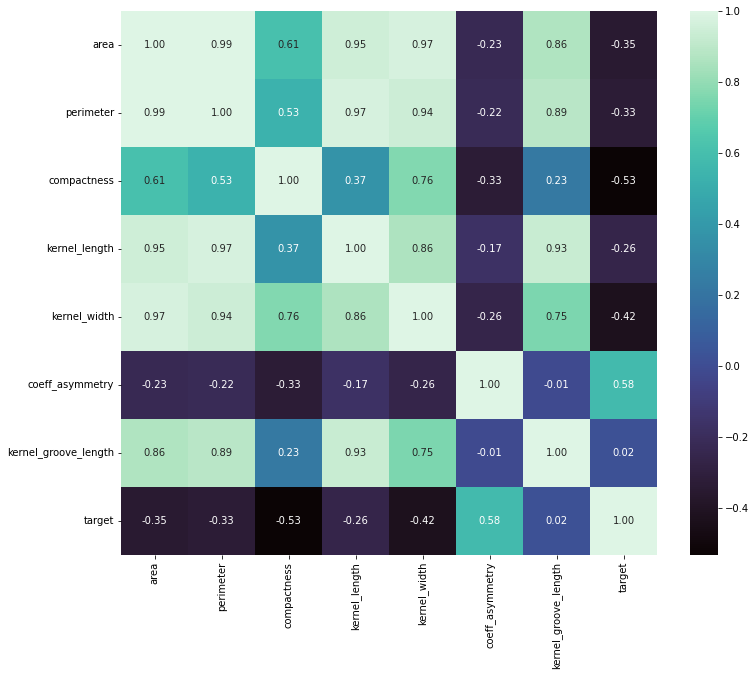

In [480]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="mako")

<AxesSubplot:xlabel='area'>

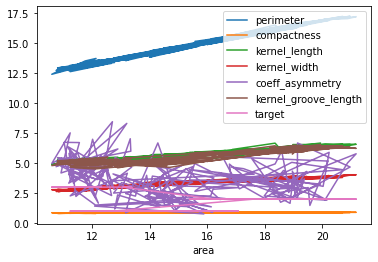

In [481]:
df1.plot(x='area',kind='line')

Saving figure:  Line Plot of area


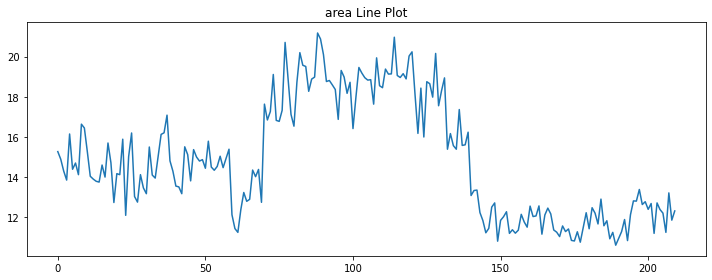

Saving figure:  Line Plot of perimeter


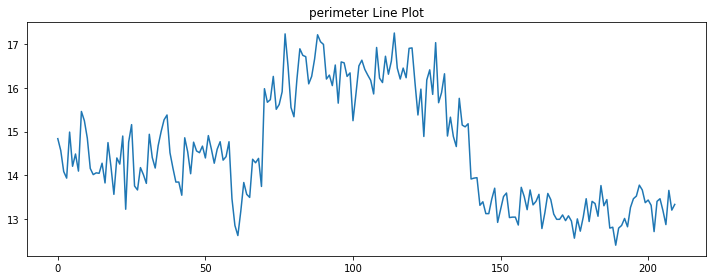

Saving figure:  Line Plot of compactness


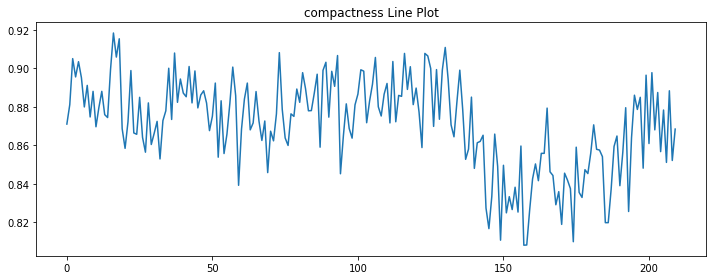

Saving figure:  Line Plot of kernel_length


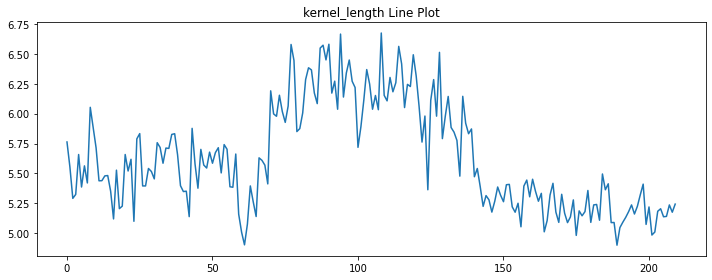

Saving figure:  Line Plot of kernel_width


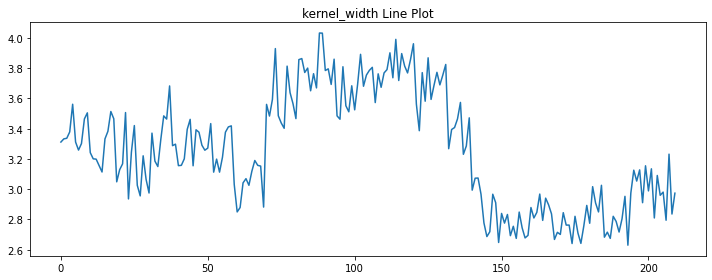

Saving figure:  Line Plot of coeff_asymmetry


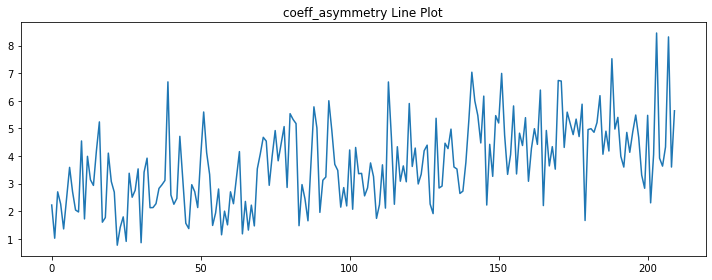

Saving figure:  Line Plot of kernel_groove_length


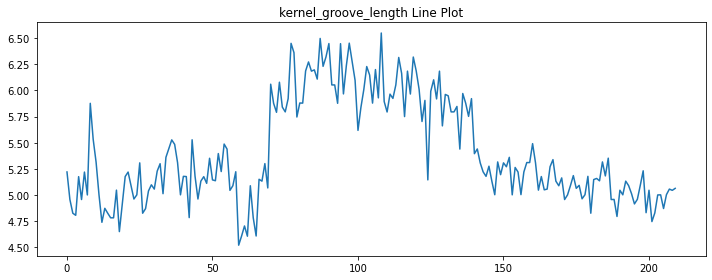

Saving figure:  Line Plot of target


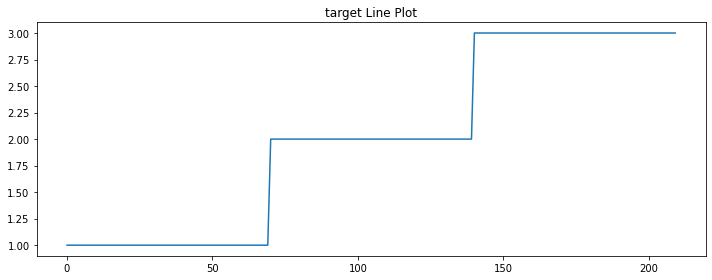

In [482]:

for i in df1.columns.to_list():
    plt.figure(figsize=(10,4))
    plt.plot(i , linestyle='-', data=df1)
    plt.title(f"{i} Line Plot")
    save_fig(f"Line Plot of {i}")
    plt.show()

In [483]:
df.corr().value_counts()

area       perimeter  compactness  kernel_length  kernel_width  coeff_asymmetry  kernel_groove_length
-0.229572  -0.217340  -0.331471    -0.171562      -0.258037      1.000000        -0.011079               1
 0.608288   0.529244   1.000000     0.367915       0.761635     -0.331471         0.226825               1
 0.863693   0.890784   0.226825     0.932806       0.749131     -0.011079         1.000000               1
 0.949985   0.972422   0.367915     1.000000       0.860415     -0.171562         0.932806               1
 0.970771   0.944829   0.761635     0.860415       1.000000     -0.258037         0.749131               1
 0.994341   1.000000   0.529244     0.972422       0.944829     -0.217340         0.890784               1
 1.000000   0.994341   0.608288     0.949985       0.970771     -0.229572         0.863693               1
dtype: int64

Saving figure:  hist Plots


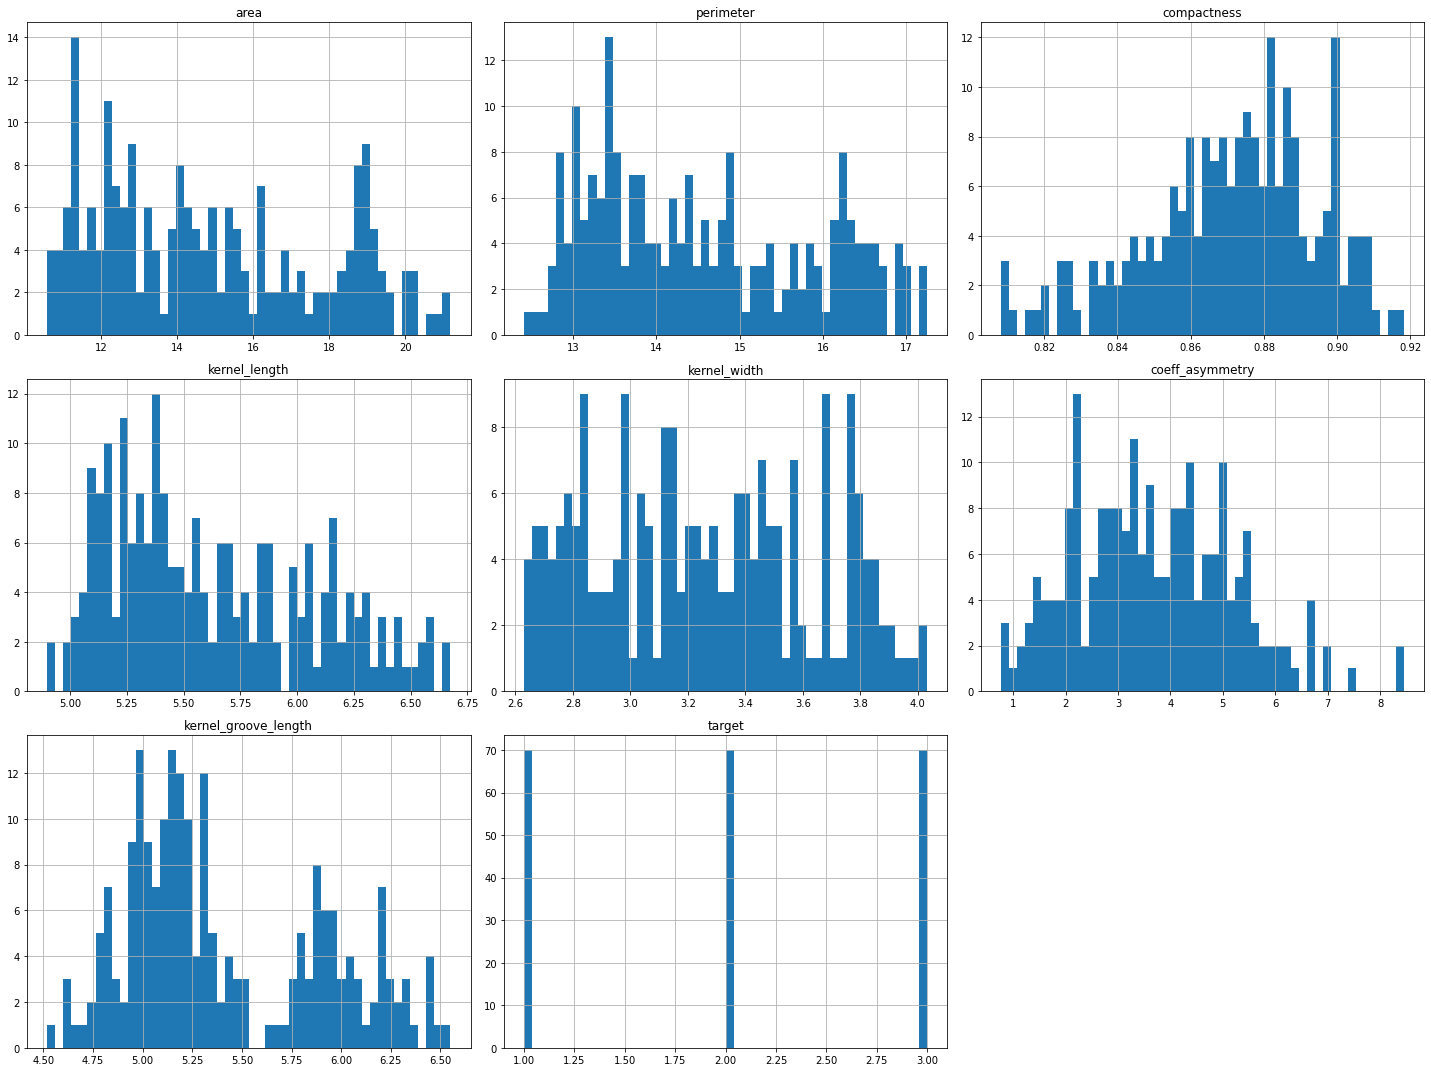

In [484]:
df1.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
save_fig("hist Plots")
plt.show()

In [614]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [498]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [499]:
scaler = StandardScaler()

In [500]:
def scaling(X_train,X_test):
    scaler = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc = scaler.transform(X_test)
    return X_train_sc, X_test_sc

In [524]:
X_train_sc, X_test_sc = scaling(X_train, X_test)
X_train_sc.shape, X_test_sc.shape

((157, 7), (53, 7))

In [506]:
def pre_post_box_plot(X_train, X_train_sc):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(data = X_train)
    plt.title("Without Scalling")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data = X_train_sc)
    plt.title("With Scalling")
    save_fig("With and Widhout Scalling")

Saving figure:  With and Widhout Scalling


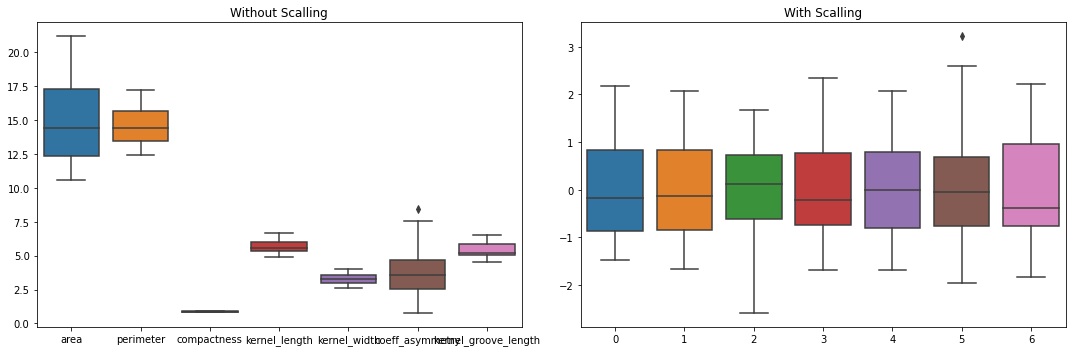

In [507]:
pre_post_box_plot(X_train, X_train_sc)

Saving figure:  With and Widhout Scalling


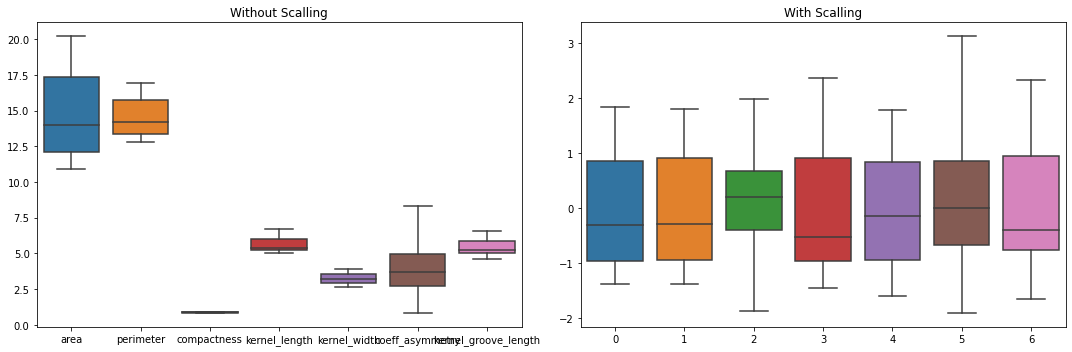

In [508]:
pre_post_box_plot(X_test, X_test_sc)

In [509]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [573]:
logistic = LogisticRegression(penalty='l2', max_iter=100)
svc = SVC(kernel = 'rbf')
dtree =  DecisionTreeClassifier(criterion= 'gini')
knn = KNeighborsClassifier(n_neighbors = 5)
gauss = GaussianNB()
rfc = RandomForestClassifier(criterion='gini',n_estimators= 100)

models = [logistic, dtree ,knn]
models_name = ['logistic','dtree','knn']

In [548]:
dir(logistic)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'warm_start']

In [574]:
def prediction(models, models_name):
    list_pred = []
    fit_models = []
    for model, name in list(zip(models, models_name)):
        model.fit(X_train_sc, y_train)
        y_pred = model.predict(X_test_sc)
        final_name = (f"{name}_pred", y_pred)
        fit_models.append(model)
        list_pred.append(final_name)
    return list_pred, fit_models
        

In [578]:
predicted, fitted = prediction(models, models_name)

In [582]:
len(predicted)
for i in predicted:
    print(i[1])
    print(" ")
for i in fitted:
    print(i)
    print(" ")

[1 3 2 1 3 3 1 3 1 3 2 3 3 2 1 2 3 1 3 2 2 1 3 2 2 3 1 2 1 3 3 3 2 1 2 2 3
 2 2 3 1 3 3 2 3 1 3 2 2 1 1 3 2]
 
[1 3 2 1 1 3 1 3 1 3 2 3 3 2 1 2 1 2 3 2 2 1 3 1 2 3 1 2 3 3 3 3 1 1 2 2 3
 2 2 3 1 3 3 2 3 1 3 2 2 1 1 3 2]
 
[1 3 2 1 1 3 1 3 1 3 2 3 3 2 1 2 1 1 3 2 2 1 3 2 2 3 1 2 1 3 3 3 2 1 2 2 3
 2 2 3 1 3 3 2 3 1 3 2 2 1 1 3 2]
 
LogisticRegression()
 
DecisionTreeClassifier()
 
KNeighborsClassifier()
 


In [583]:
for y_pred, model in list(zip(predicted, fitted)):
    print(model.classes_)

[1 2 3]
[1 2 3]
[1 2 3]


In [605]:
from sklearn.metrics import accuracy_score, log_loss, f1_score, roc_auc_score,\
            classification_report, confusion_matrix, ConfusionMatrixDisplay

def plot_confusionMetrics(y_test, y_pred_list, models_list):
    for y_pred, models in list(zip(y_pred_list, models_list)):
        cm = confusion_matrix(y_test, y_pred[1], labels=models.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models.classes_)
        disp.plot()
        #x = f"{models.__class__}".split()[1].split(".")[3].split("'")[0]
        x = f"{models.__class__}"
        plt.title(x)
        plt.xlabel("Predicted Results")
        plt.ylabel("Actual Results")
        save_fig(f"ConfusionMetrics: {models.__class__}")
        plt.show()

def confusionMetrics(y_test, y_pred_list):
    for y_pred in y_pred_list:
        print(y_pred[0])
        cm = confusion_matrix(y_test, y_pred[1])
        print(cm, "\n")
    

    
def model_reports(y_test, y_pred_list, models_list):
    for y_pred, models in list(zip(y_pred_list, models_list)): 
        x = f"{models.__class__}"
        print(f"-----<><>---<><><-------{x}-----<>----<><><><>---------")
        print(classification_report(y_test,y_pred[1]))
    

In [ ]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

In [643]:
def metric_report(y_test, y_pred_list,models_list):
    accuracy = []
    log_losses = []
    f1_scores = []
    roc_auc_scores = []
    for y_pred, models in list(zip(y_pred_list, models_list)):
        accu = accuracy_score(y_test, y_pred[1])
        accuracy.append(accu)
        
        y_prob = models.predict_proba(X_test)
        logLoss = log_loss(y_test, y_prob)
        log_losses.append(logLoss)
        
        f1Score = f1_score(y_test, y_pred[1], pos_label='positive', average='micro')
        f1_scores.append(f1Score)
        
        y_prob = models.predict_proba(X_test)
        rocAuc = roc_auc_score(y_test, y_prob, multi_class="ovr", average='macro')
        roc_auc_scores.append(rocAuc)  
        
    dict_all = {"Accuracy":accuracy, "Log_Loss":log_losses, "F1_Scores":f1_scores, "RocAucCurve":roc_auc_scores}
    df = pd.DataFrame(dict_all, index=['Logistic',"DecisionTree", "KNN"])
    return df

In [644]:
metric_report(y_test, predicted, fitted)
# accuracy_score(y_test, predicted[1][1])
# # log_loss(y_test, predicted[1][1])
# f1_score(y_test, predicted[1][1],pos_label='positive', average='micro')


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


,Accuracy,Log_Loss,F1_Scores,RocAucCurve
Logistic,0.924528,22.779572,0.924528,0.77703
DecisionTree,0.849057,22.808626,0.849057,0.50000
KNN,0.924528,22.808626,0.924528,0.50000


Saving figure:  ConfusionMetrics: <class 'sklearn.linear_model._logistic.LogisticRegression'>


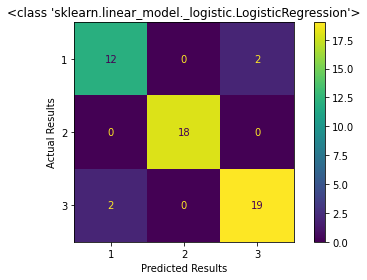

Saving figure:  ConfusionMetrics: <class 'sklearn.tree._classes.DecisionTreeClassifier'>


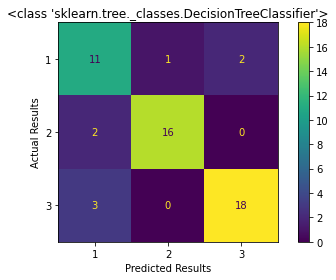

Saving figure:  ConfusionMetrics: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>


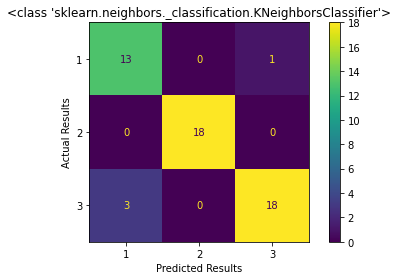

In [598]:
plot_confusionMetrics(y_test, predicted, fitted)

In [591]:
# plot_confusionMetrics(y_test, predicted, fitted)
confusionMetrics(y_test, predicted)

logistic_pred
[[12  0  2]
 [ 0 18  0]
 [ 2  0 19]] 

dtree_pred
[[11  1  2]
 [ 2 16  0]
 [ 3  0 18]] 

knn_pred
[[13  0  1]
 [ 0 18  0]
 [ 3  0 18]] 



In [592]:
model_reports(y_test, predicted, fitted)

-----<><>---<><><-------<class 'sklearn.linear_model._logistic.LogisticRegression'>-----<>----<><><><>---------
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       1.00      1.00      1.00        18
           3       0.90      0.90      0.90        21

    accuracy                           0.92        53
   macro avg       0.92      0.92      0.92        53
weighted avg       0.92      0.92      0.92        53

-----<><>---<><><-------<class 'sklearn.tree._classes.DecisionTreeClassifier'>-----<>----<><><><>---------
              precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.94      0.89      0.91        18
           3       0.90      0.86      0.88        21

    accuracy                           0.85        53
   macro avg       0.84      0.84      0.84        53
weighted avg       0.86      0.85      0.85        53

-----<><>---<><><--

## KNN is best model among all trained Model

In [656]:
knn_final = KNeighborsClassifier()
scores = []
k_value = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    y_pred_k = knn.predict(X_test_sc)
    accu = accuracy_score(y_test, y_pred_k)
    scores.append(accu)
    k_value.append(k)
    

In [657]:
scores

[0.9056603773584906,
 0.8679245283018868,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9245283018867925,
 0.9056603773584906,
 0.9056603773584906,
 0.9056603773584906,
 0.9245283018867925,
 0.9056603773584906,
 0.9056603773584906]

Saving figure:  K values vs Accuracy: KNN


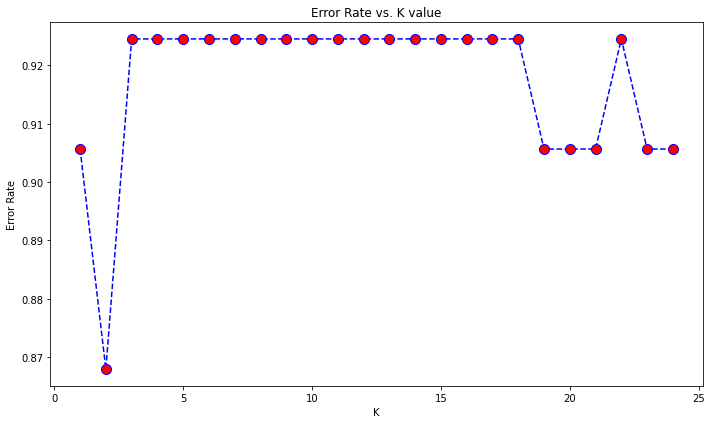

In [659]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25), scores, color='blue',linestyle='dashed',
       marker='o', markerfacecolor='red',markersize=10)
plt.title("Error Rate vs. K value")
plt.xlabel("K")
plt.ylabel("Error Rate")
save_fig("K values vs Accuracy: KNN")
plt.show()

In [669]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_get_backend_mod',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_

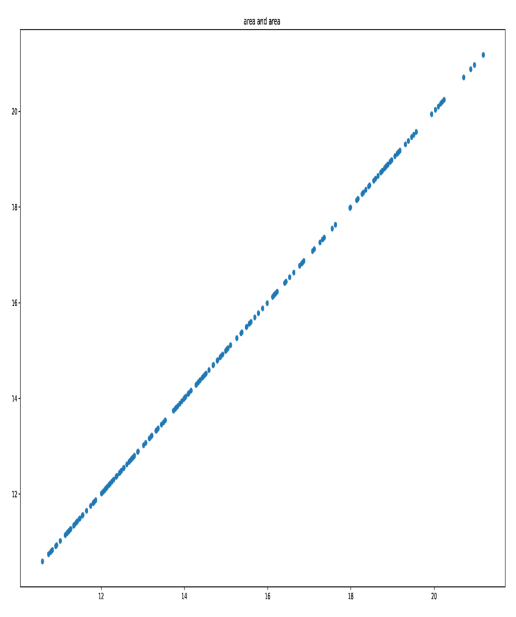

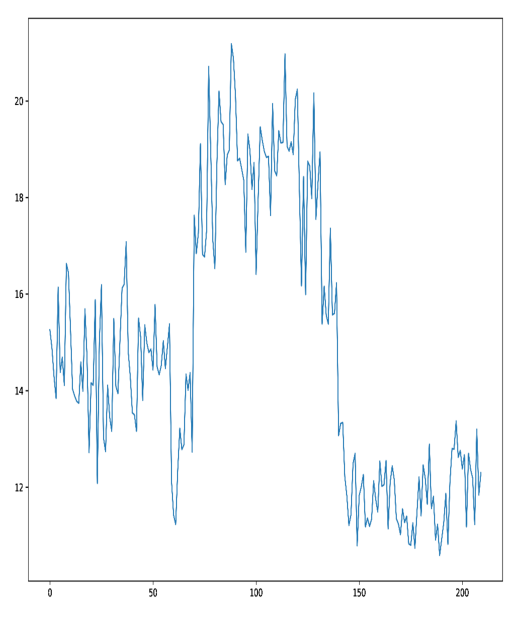

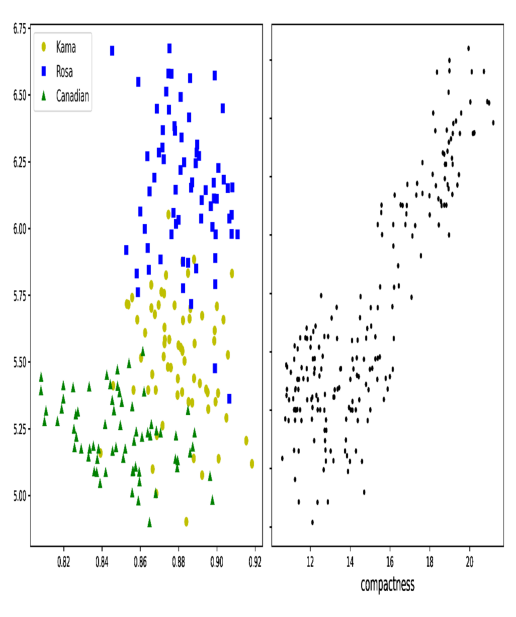

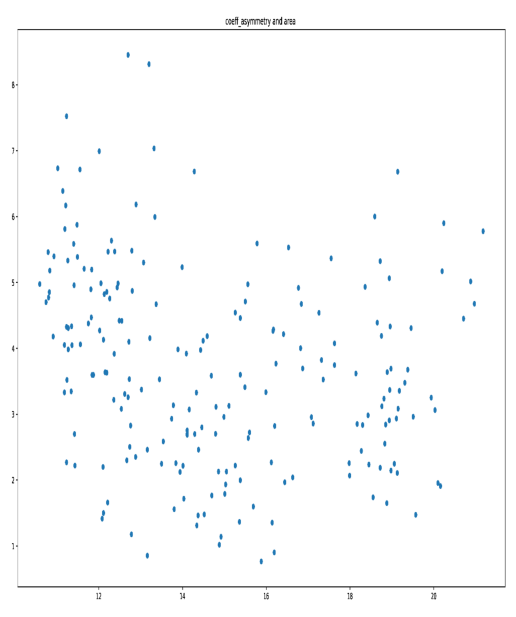

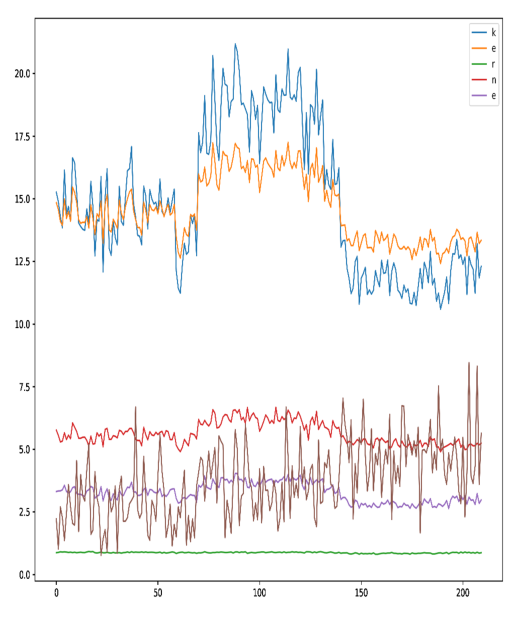

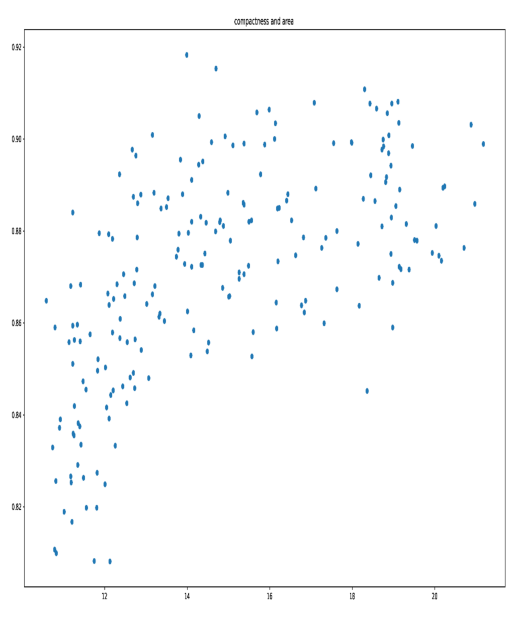

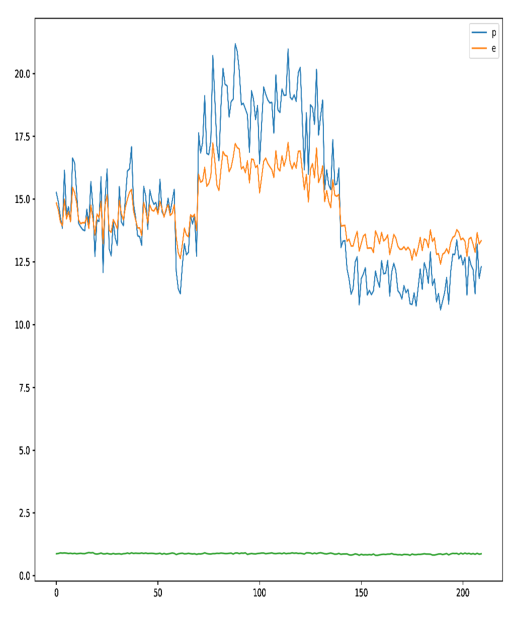

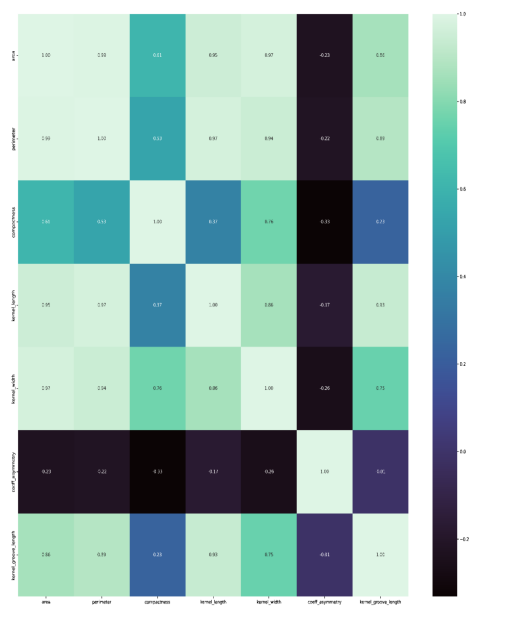

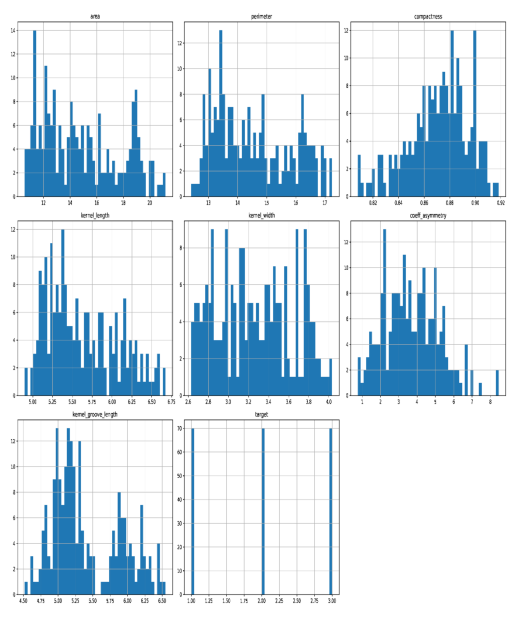

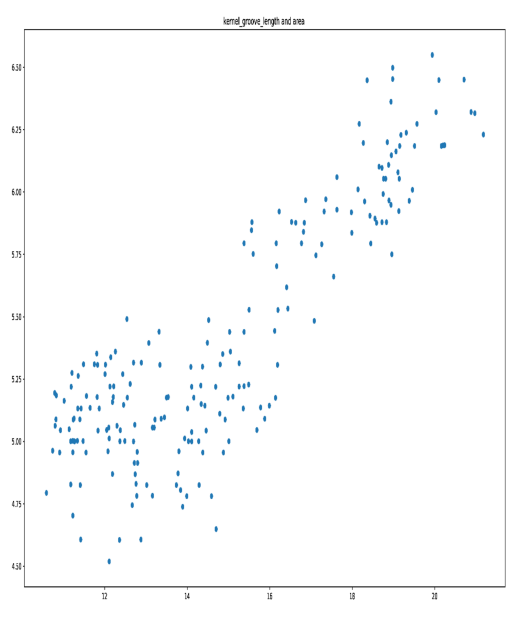

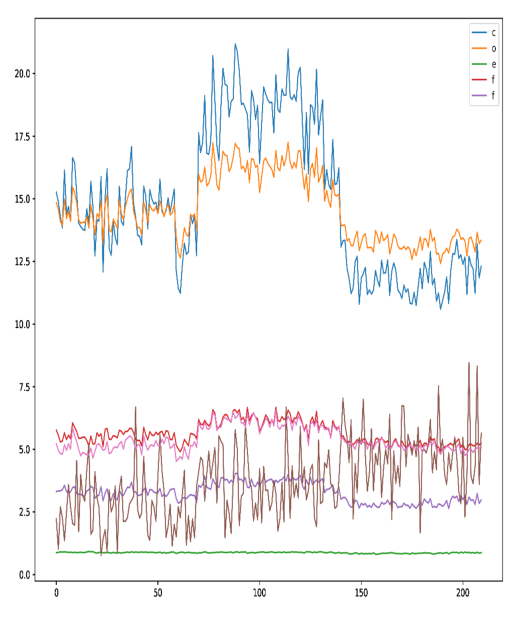

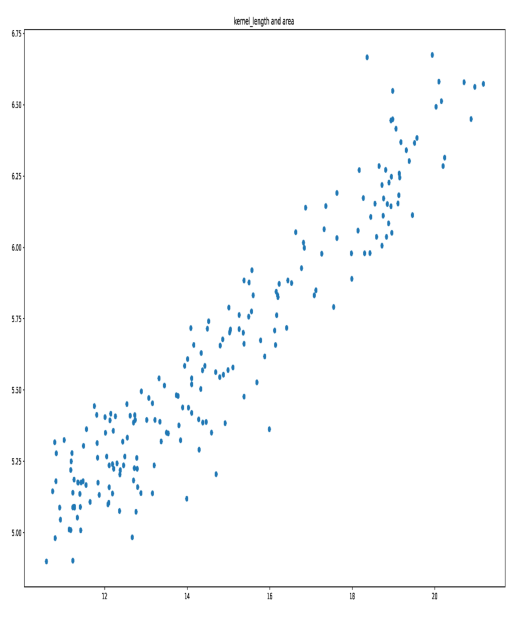

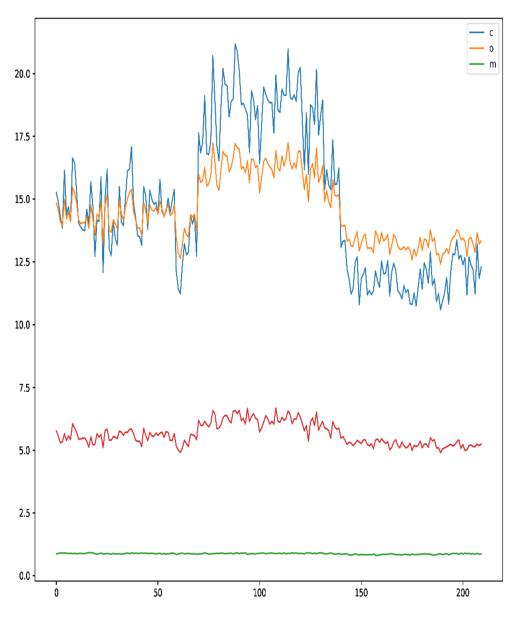

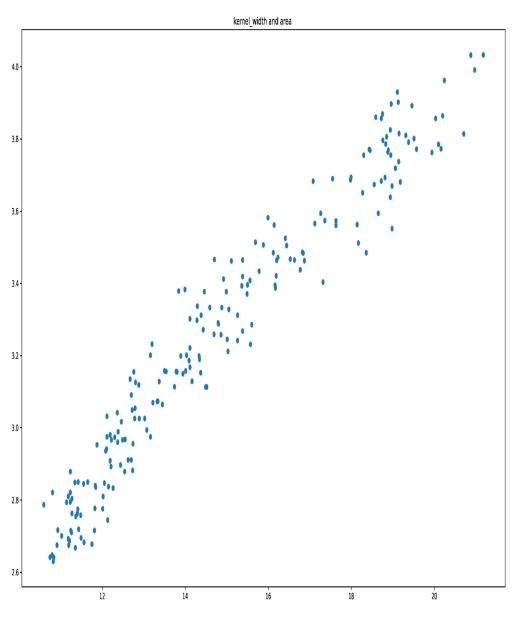

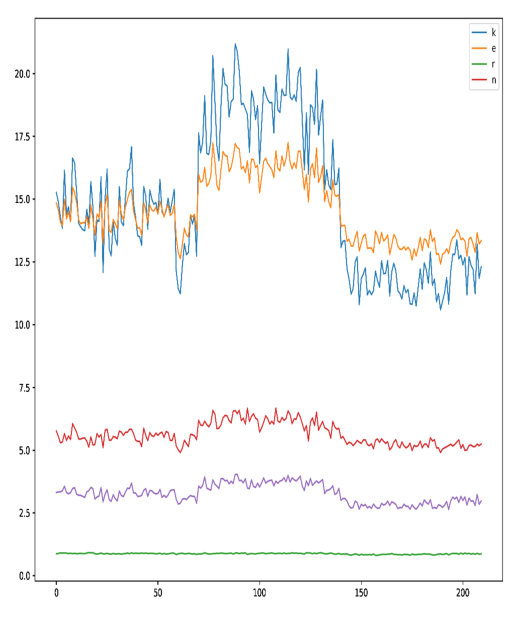

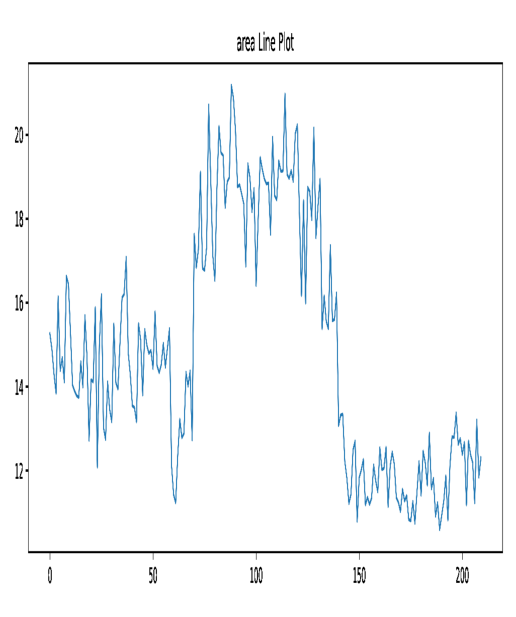

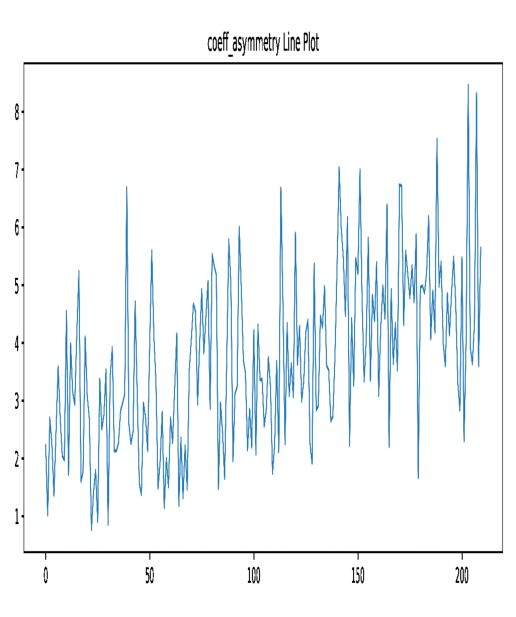

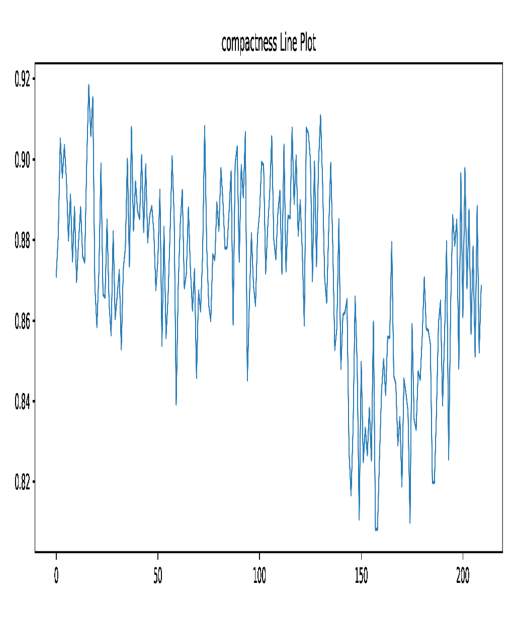

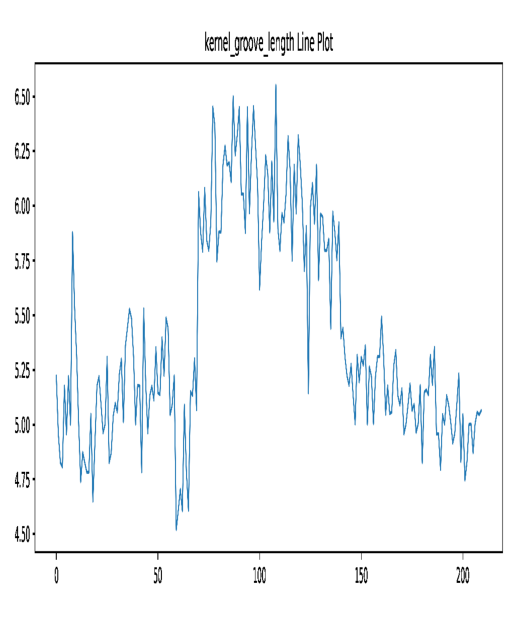

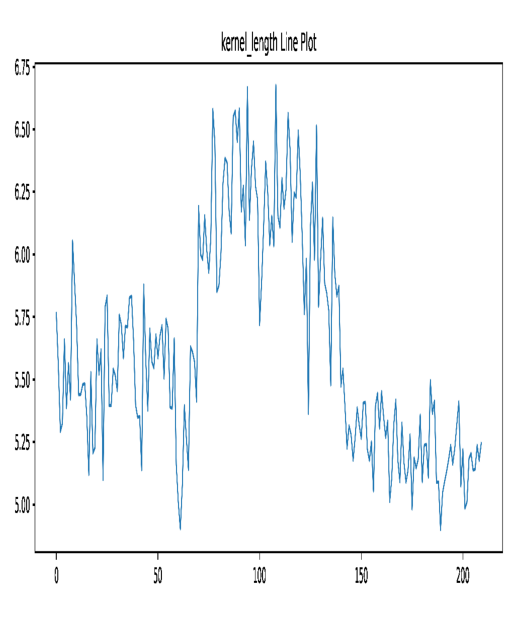

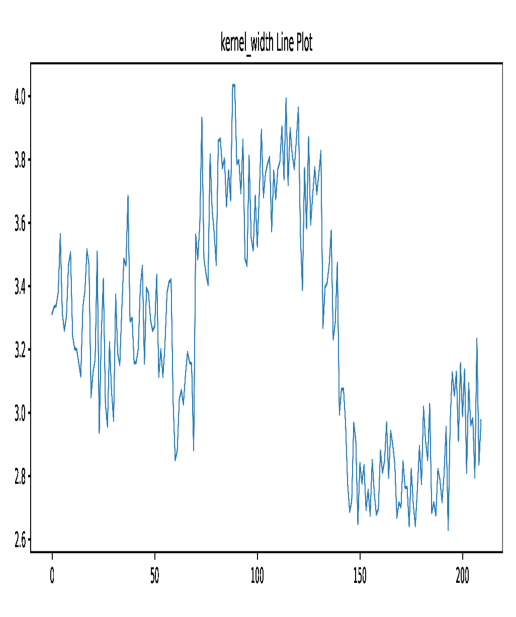

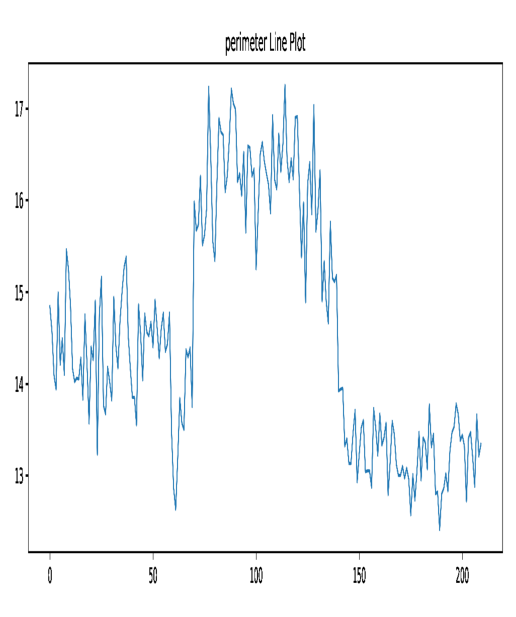

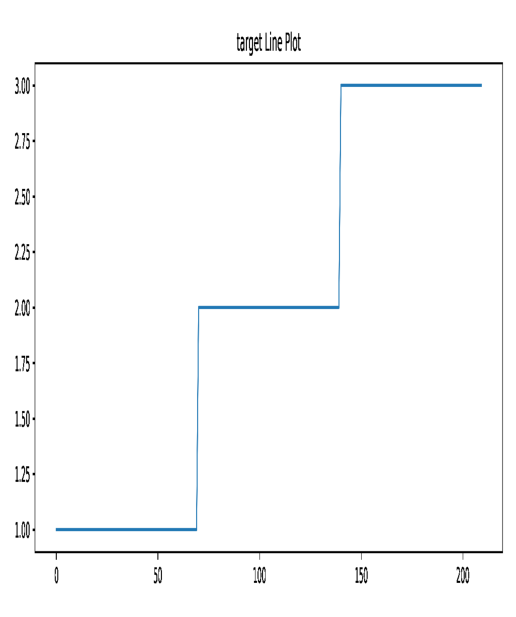

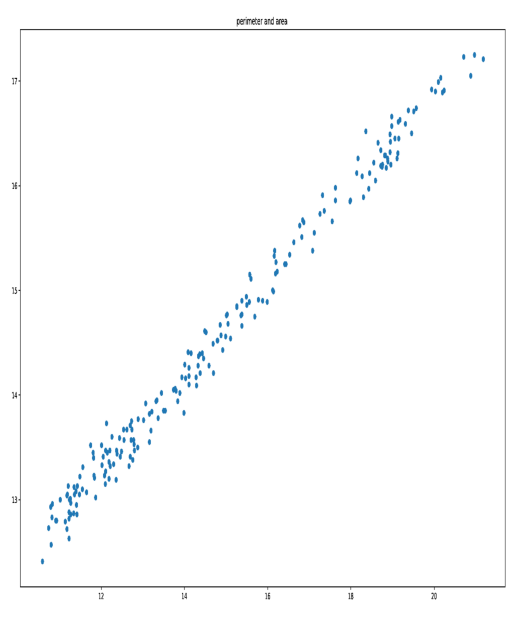

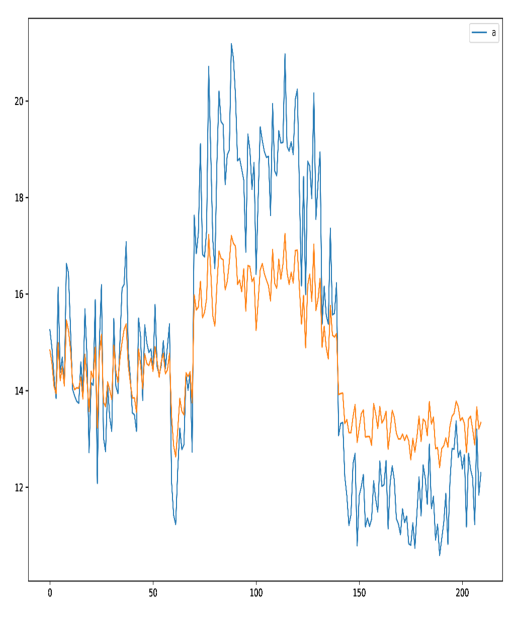

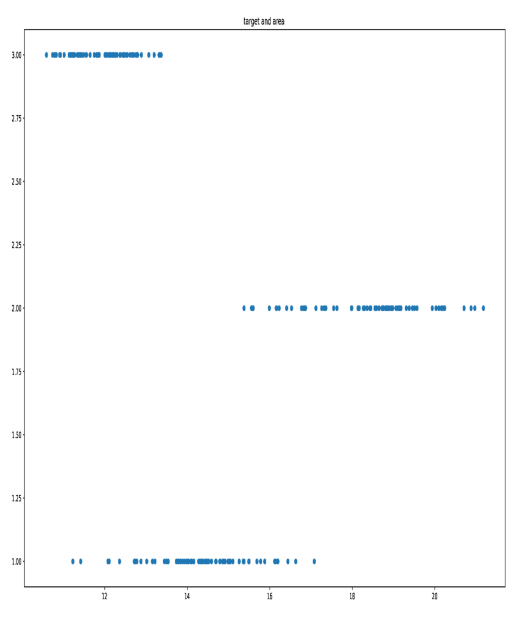

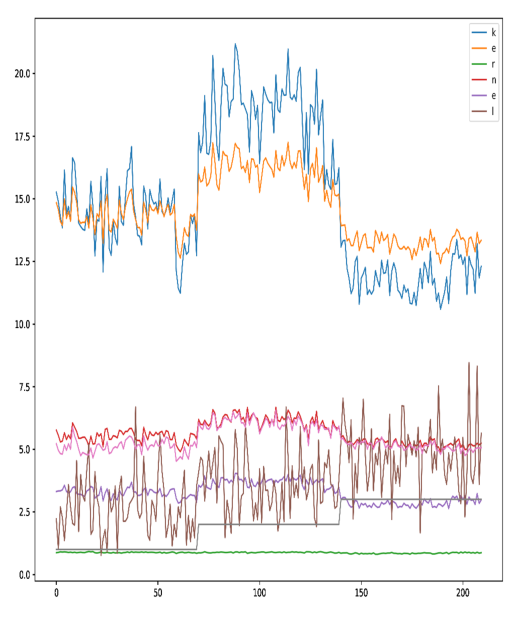

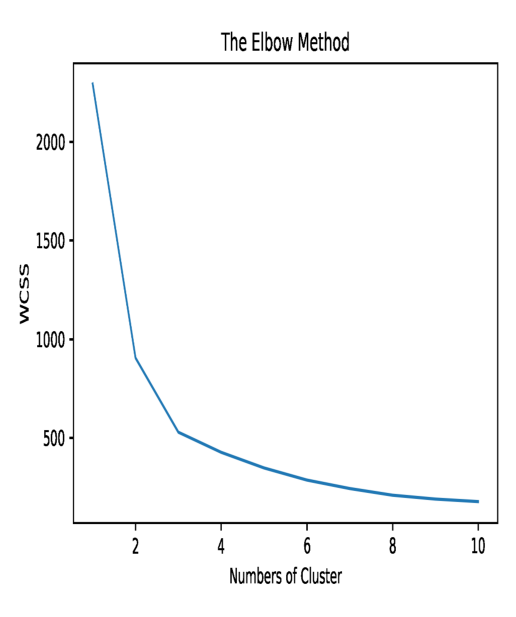

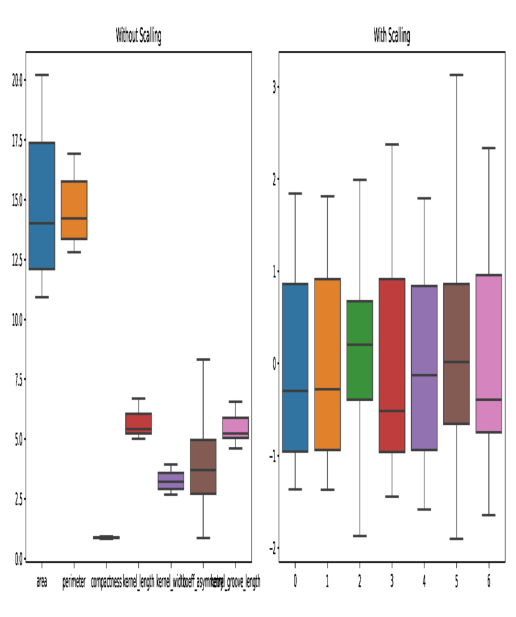

In [25]:
os.listdir(img_path)
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images= os.listdir(img_path)

for i in images:
    if ".png" in i:
        plt.figure(figsize=(9 , 18))
        image_path = os.path.join(img_path, i)
        im = cv2.imread(image_path)
        im_resized = cv2.resize(im, (1000, 1200), interpolation=cv2.INTER_LINEAR)
        plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()          


In [14]:
images= os.listdir(img_path)
images[0]
img_path
images[0]

'area and area .png'

In [26]:
n_rows= 8
n_cols = 4
images= os.listdir(img_path)

plt.figure(figsize=(n_cols* 1.2 , n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        image_path = os.path.join(img_path, images[index])
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(image_path, cmap="binary", interpolation="nearest")
        plt.axis("off")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig("Fasion_mnist_plot", tight_layout=False)
plt.show()